In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N_CITIES = 20  # DNA size
CROSS_RATE = 0.1
MUTATE_RATE = 0.02
POP_SIZE = 500
N_GENERATIONS = 500

In [3]:
class GA(object):
    def __init__(self, DNA_size, cross_rate, 
                 mutation_rate, pop_size,):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size
        self.pop = np.vstack(
        [np.random.permutation(DNA_size) for _ in range(pop_size)])
    
    def translateDNA(self, DNA, city_position):
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y
    
    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), 
                                  dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(
                np.square(np.diff(xs)) + np.square(np.diff(ys))))
            
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        return fitness, total_distance
    
    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), 
            size=self.pop_size, replace=True, 
            p=fitness / fitness.sum())
        return self.pop[idx]
    
    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)
            keep_city = parent[~cross_points]
            # API待查
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent
    
    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child
    
    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

In [4]:
class TravelSalesPerson(object):
    def __init__(self, n_cities):
        self.city_position = np.random.rand(n_cities, 2)
        plt.ion()
    
    def plotting(self, lx, ly, total_d):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, 
            self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, 'Total distance=%.2f' % total_d,
                fontdict={'size': 20, 'color': 'red'})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        plt.pause(0.01)

Gen: 0  best fit: 163.64


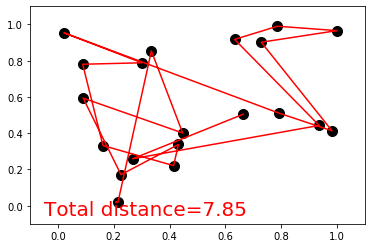

Gen: 1  best fit: 186.42


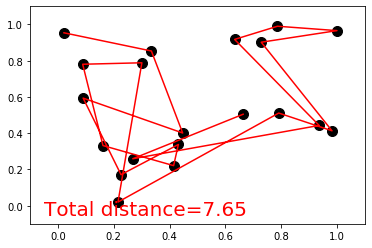

Gen: 2  best fit: 186.42


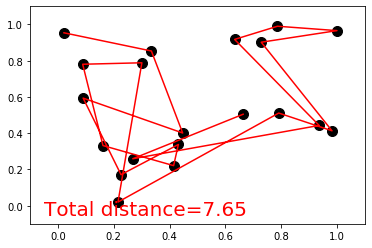

Gen: 3  best fit: 186.42


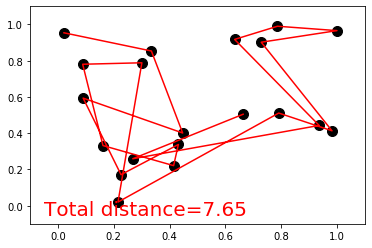

Gen: 4  best fit: 200.64


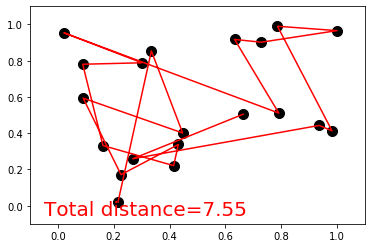

Gen: 5  best fit: 200.64


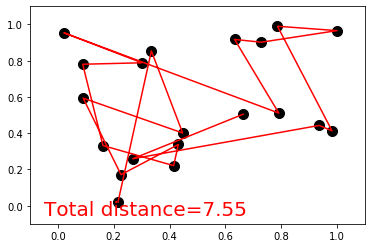

Gen: 6  best fit: 242.74


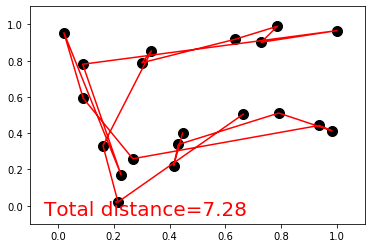

Gen: 7  best fit: 404.04


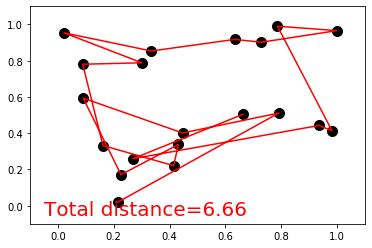

Gen: 8  best fit: 404.04


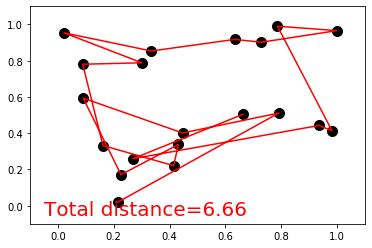

Gen: 9  best fit: 404.04


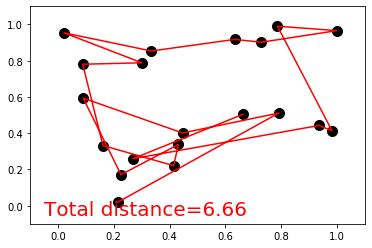

Gen: 10  best fit: 426.18


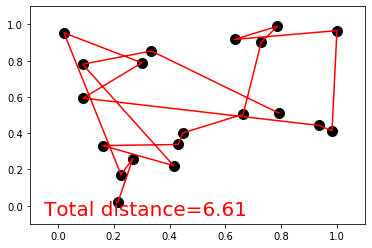

Gen: 11  best fit: 881.09


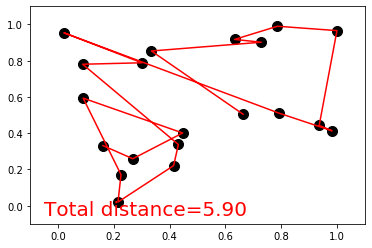

Gen: 12  best fit: 881.09


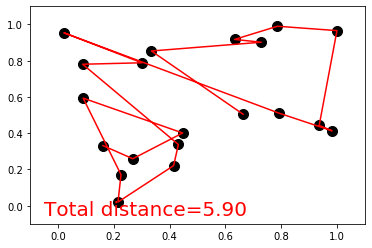

Gen: 13  best fit: 881.09


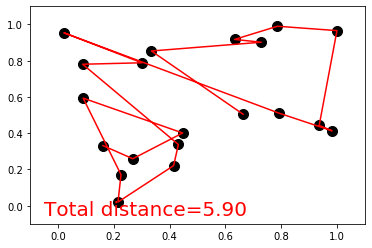

Gen: 14  best fit: 2364.37


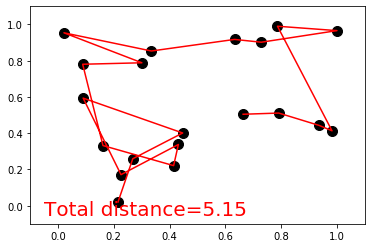

Gen: 15  best fit: 2364.37


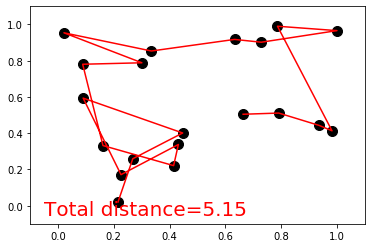

Gen: 16  best fit: 3569.60


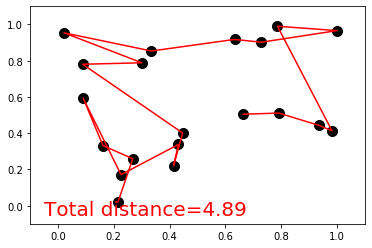

Gen: 17  best fit: 4567.34


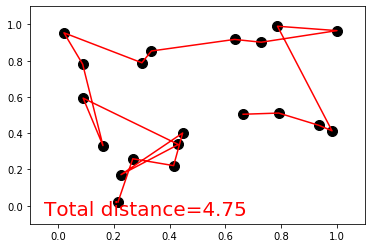

Gen: 18  best fit: 5313.82


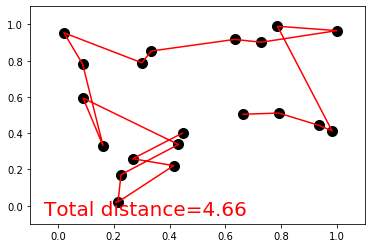

Gen: 19  best fit: 7005.07


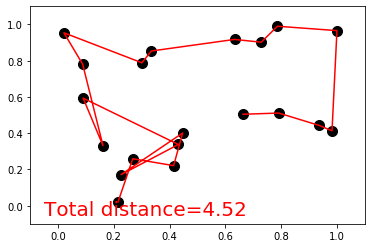

Gen: 20  best fit: 5313.82


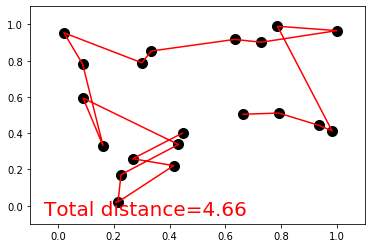

Gen: 21  best fit: 5313.82


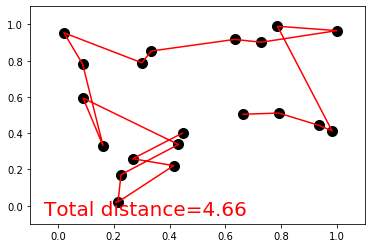

Gen: 22  best fit: 12534.93


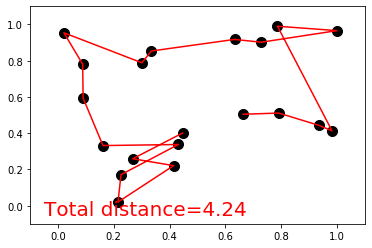

Gen: 23  best fit: 12534.93


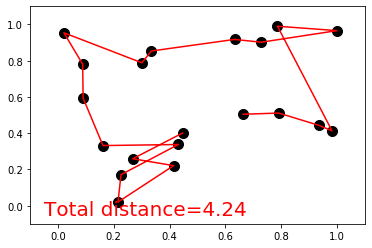

Gen: 24  best fit: 14598.63


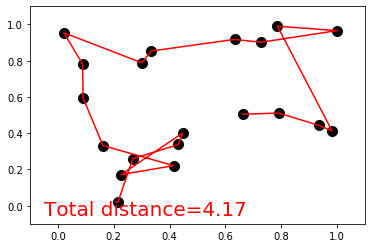

Gen: 25  best fit: 21501.59


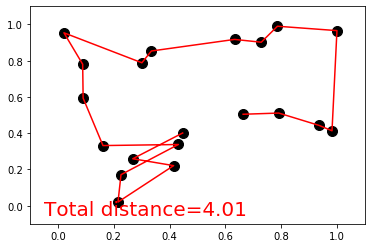

Gen: 26  best fit: 21501.59


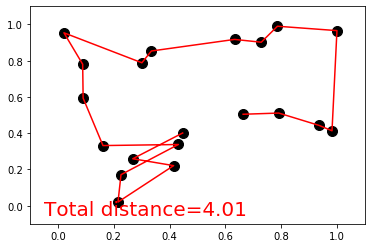

Gen: 27  best fit: 44884.30


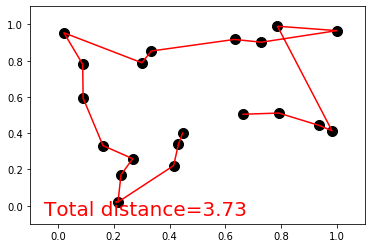

Gen: 28  best fit: 44884.30


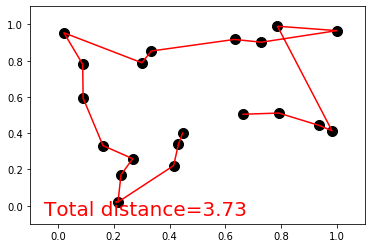

Gen: 29  best fit: 44884.30


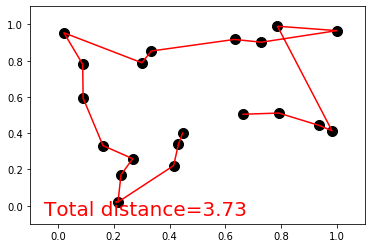

Gen: 30  best fit: 44884.30


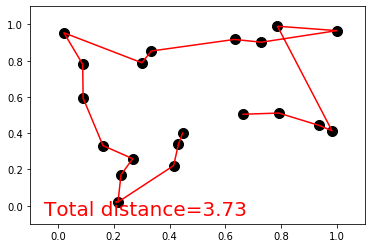

Gen: 31  best fit: 90455.55


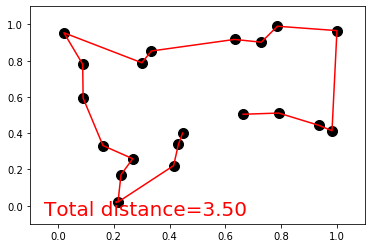

Gen: 32  best fit: 90455.55


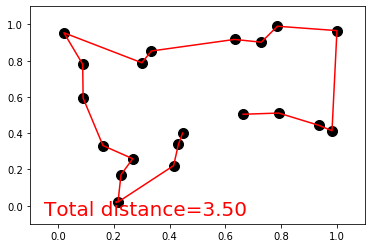

Gen: 33  best fit: 90455.55


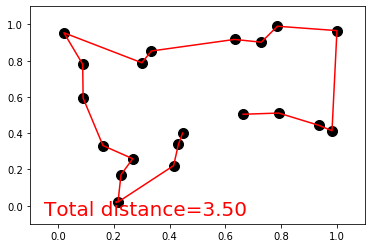

Gen: 34  best fit: 90455.55


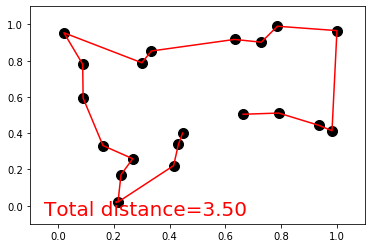

Gen: 35  best fit: 90455.55


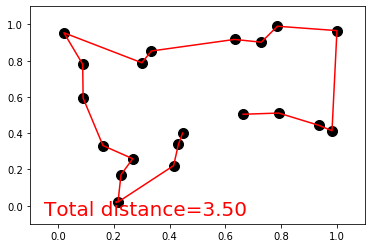

Gen: 36  best fit: 90455.55


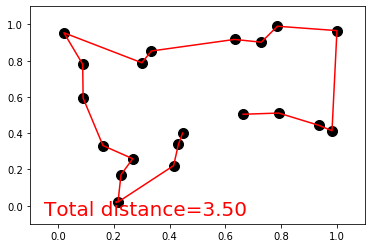

Gen: 37  best fit: 90455.55


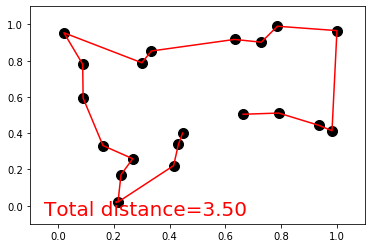

Gen: 38  best fit: 90455.55


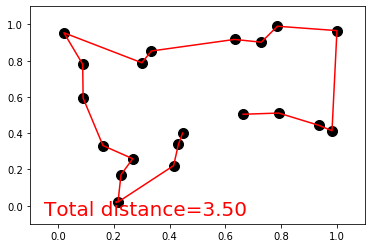

Gen: 39  best fit: 90455.55


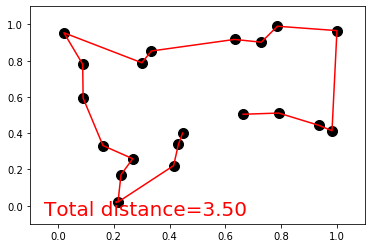

Gen: 40  best fit: 90455.55


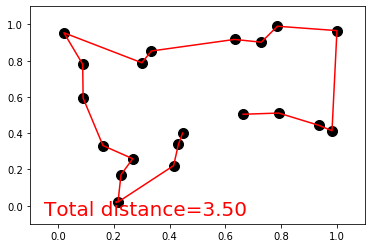

Gen: 41  best fit: 90455.55


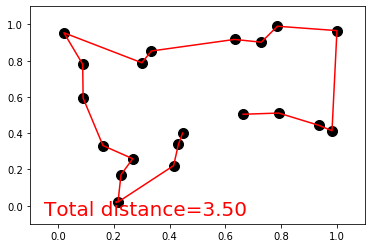

Gen: 42  best fit: 90455.55


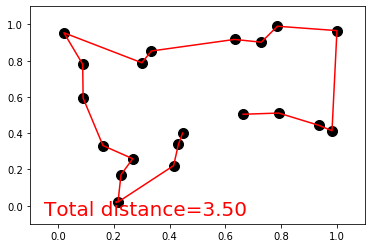

Gen: 43  best fit: 90455.55


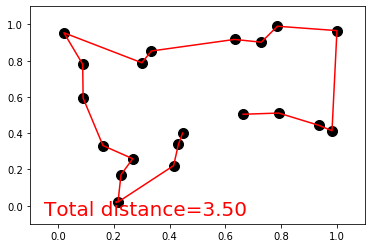

Gen: 44  best fit: 90455.55


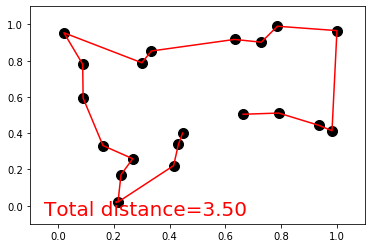

Gen: 45  best fit: 90455.55


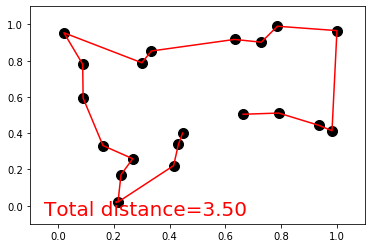

Gen: 46  best fit: 90455.55


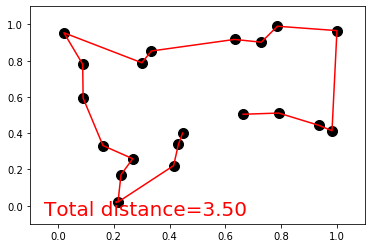

Gen: 47  best fit: 90455.55


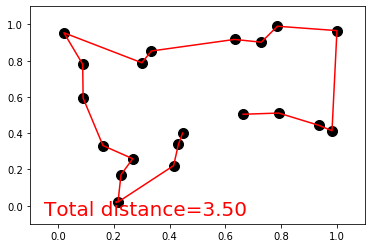

Gen: 48  best fit: 90455.55


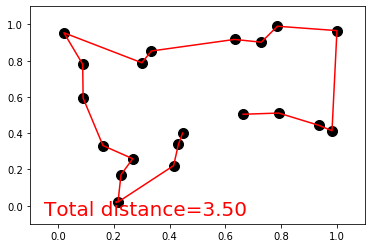

Gen: 49  best fit: 90455.55


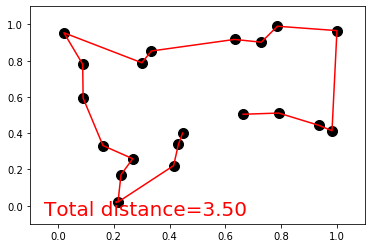

Gen: 50  best fit: 90455.55


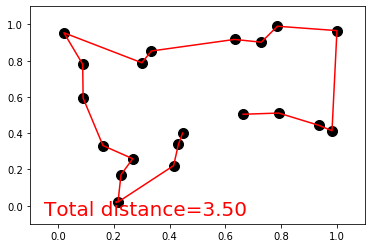

Gen: 51  best fit: 90455.55


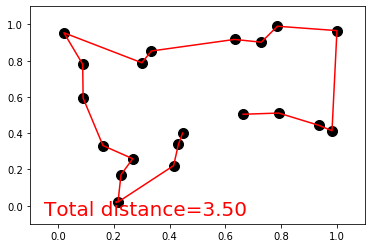

Gen: 52  best fit: 90455.55


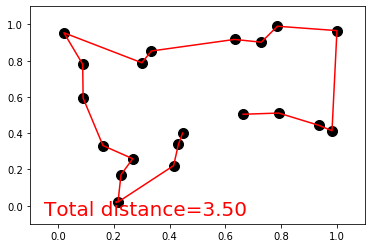

Gen: 53  best fit: 90455.55


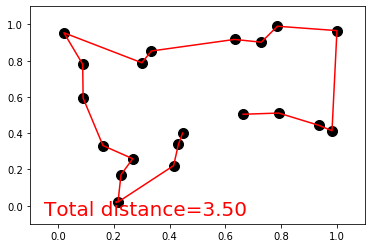

Gen: 54  best fit: 90455.55


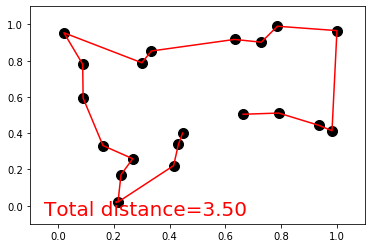

Gen: 55  best fit: 90455.55


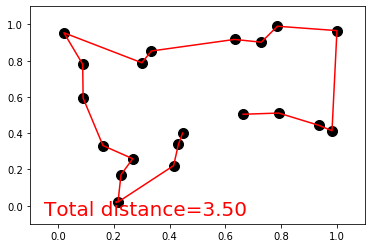

Gen: 56  best fit: 90455.55


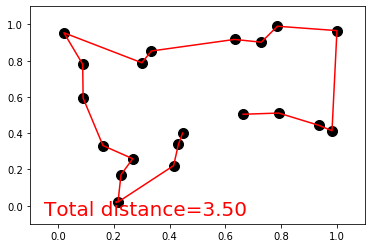

Gen: 57  best fit: 90455.55


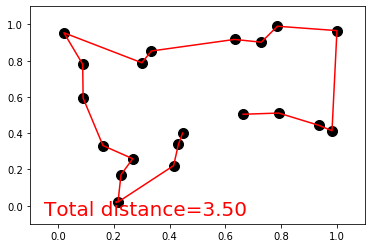

Gen: 58  best fit: 90455.55


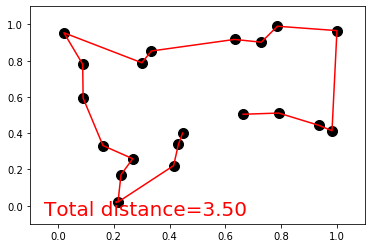

Gen: 59  best fit: 90455.55


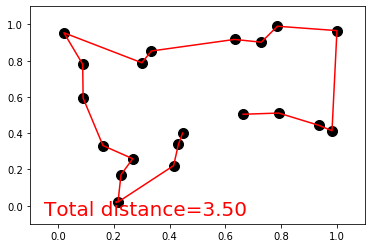

Gen: 60  best fit: 90455.55


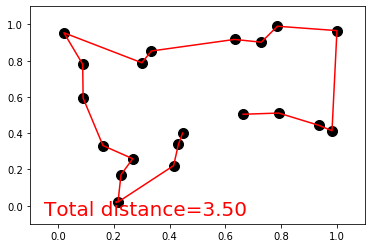

Gen: 61  best fit: 90455.55


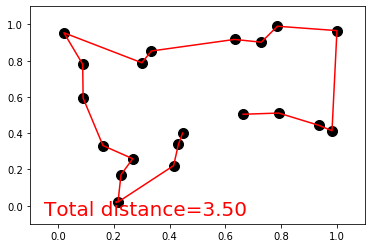

Gen: 62  best fit: 90455.55


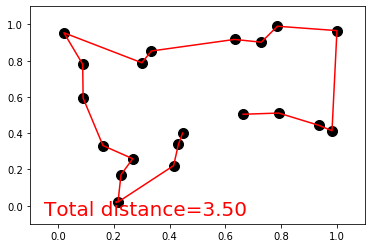

Gen: 63  best fit: 90455.55


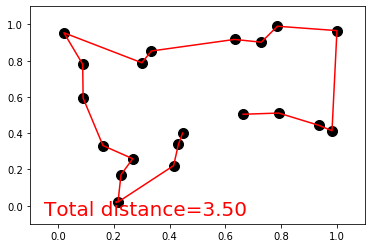

Gen: 64  best fit: 90455.55


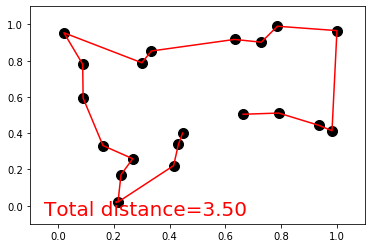

Gen: 65  best fit: 90455.55


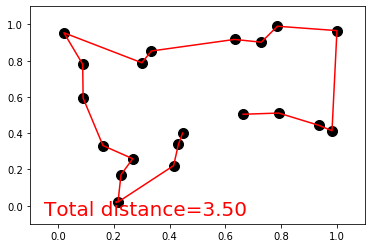

Gen: 66  best fit: 90455.55


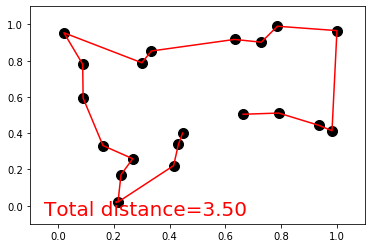

Gen: 67  best fit: 90455.55


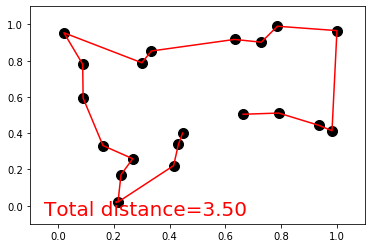

Gen: 68  best fit: 90455.55


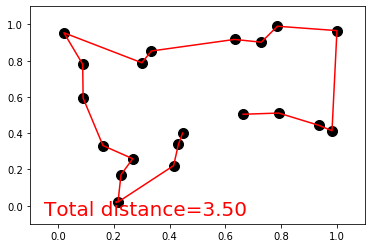

Gen: 69  best fit: 90455.55


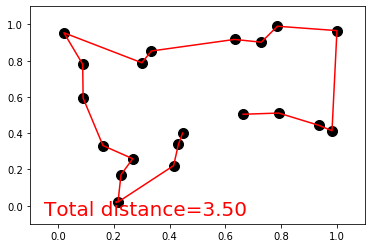

Gen: 70  best fit: 90455.55


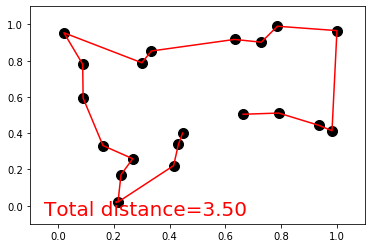

Gen: 71  best fit: 90455.55


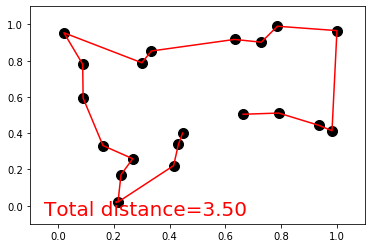

Gen: 72  best fit: 90455.55


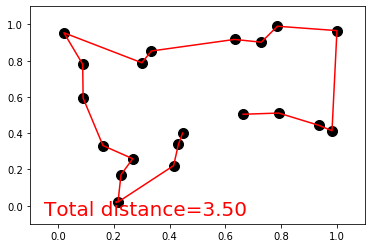

Gen: 73  best fit: 90455.55


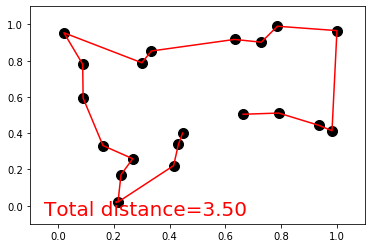

Gen: 74  best fit: 90455.55


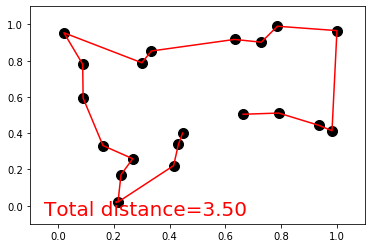

Gen: 75  best fit: 90455.55


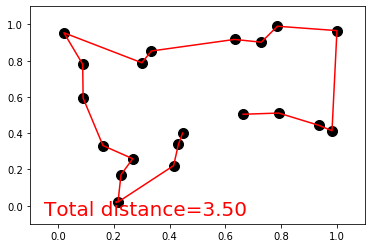

Gen: 76  best fit: 90455.55


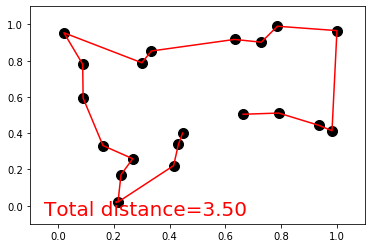

Gen: 77  best fit: 90455.55


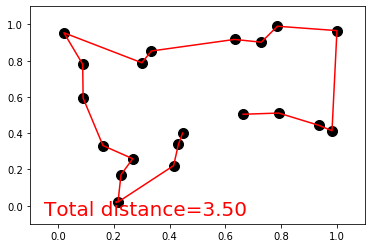

Gen: 78  best fit: 90455.55


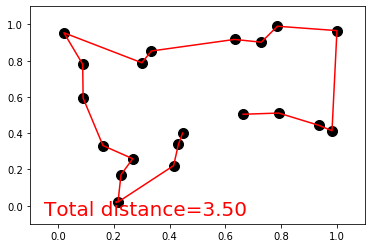

Gen: 79  best fit: 90455.55


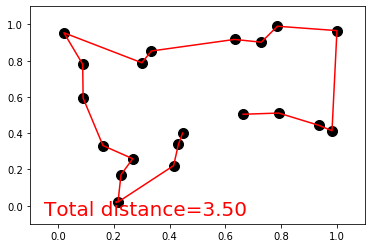

Gen: 80  best fit: 90455.55


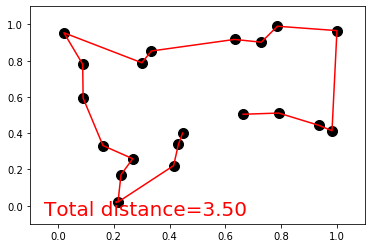

Gen: 81  best fit: 90455.55


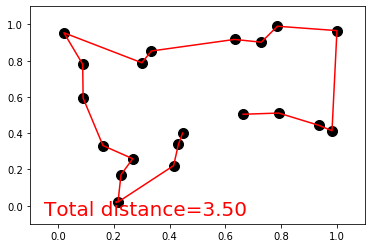

Gen: 82  best fit: 90455.55


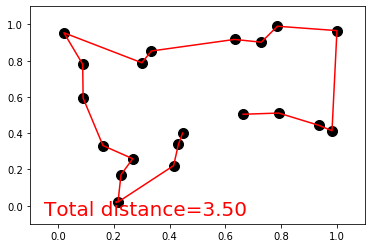

Gen: 83  best fit: 90455.55


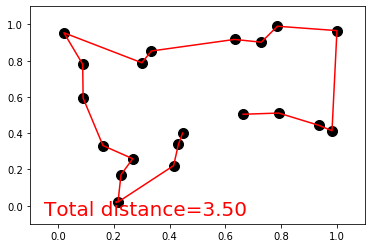

Gen: 84  best fit: 90455.55


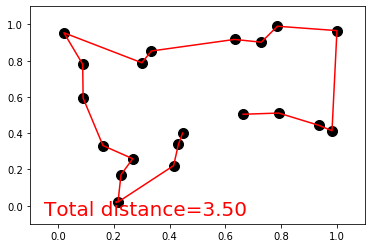

Gen: 85  best fit: 90455.55


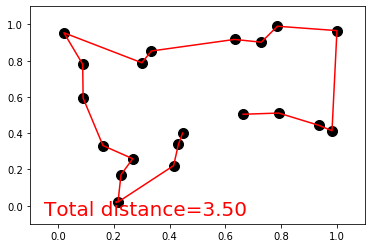

Gen: 86  best fit: 90455.55


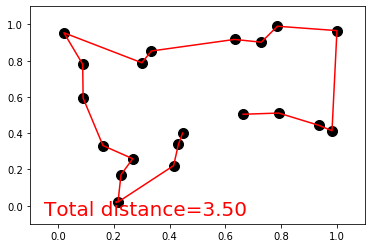

Gen: 87  best fit: 90455.55


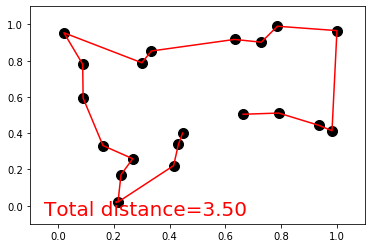

Gen: 88  best fit: 90455.55


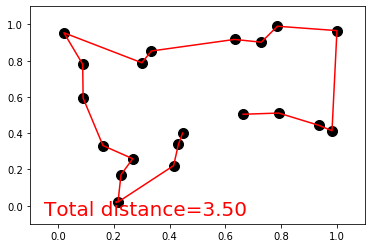

Gen: 89  best fit: 90455.55


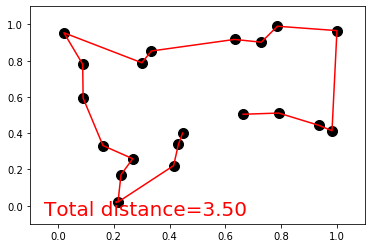

Gen: 90  best fit: 90455.55


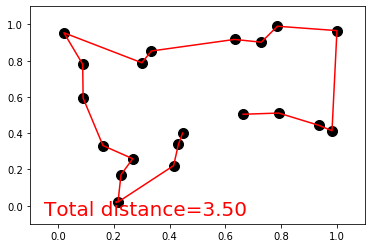

Gen: 91  best fit: 90455.55


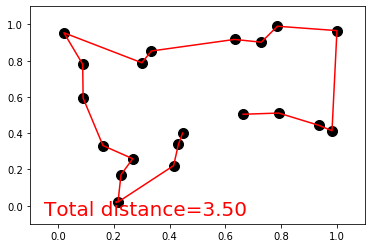

Gen: 92  best fit: 90455.55


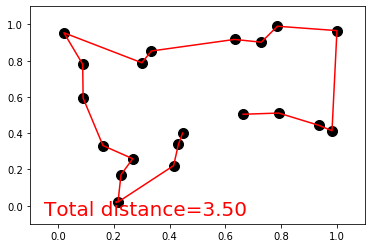

Gen: 93  best fit: 90455.55


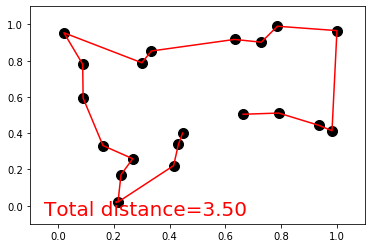

Gen: 94  best fit: 90455.55


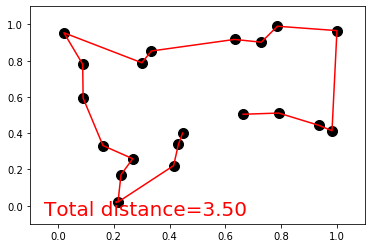

Gen: 95  best fit: 90455.55


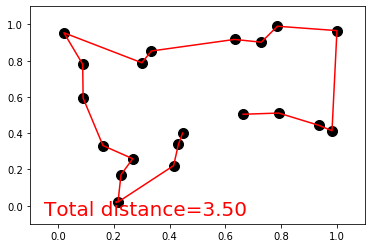

Gen: 96  best fit: 90455.55


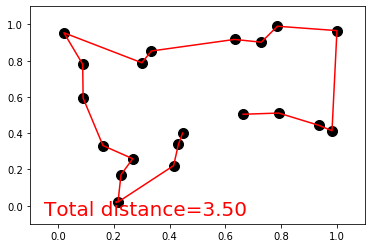

Gen: 97  best fit: 90455.55


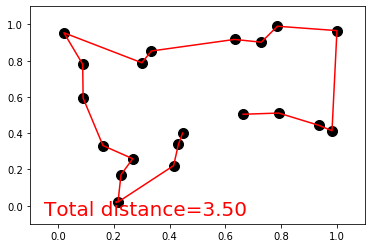

Gen: 98  best fit: 90455.55


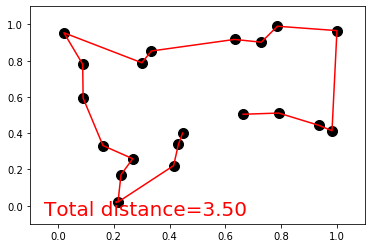

Gen: 99  best fit: 90455.55


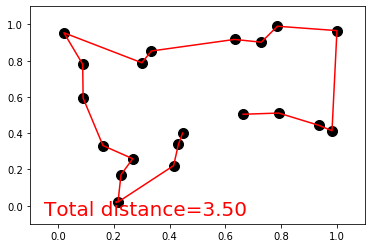

Gen: 100  best fit: 90455.55


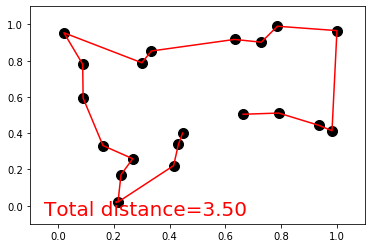

Gen: 101  best fit: 90455.55


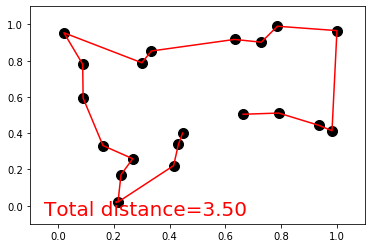

Gen: 102  best fit: 90455.55


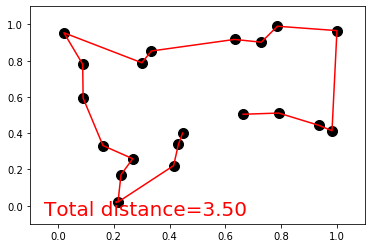

Gen: 103  best fit: 90455.55


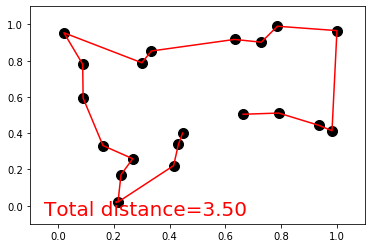

Gen: 104  best fit: 90455.55


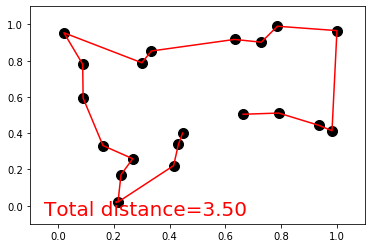

Gen: 105  best fit: 90455.55


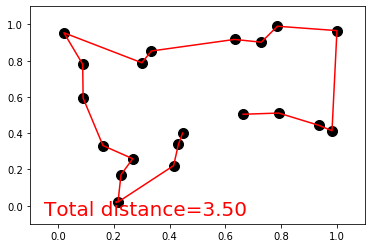

Gen: 106  best fit: 90455.55


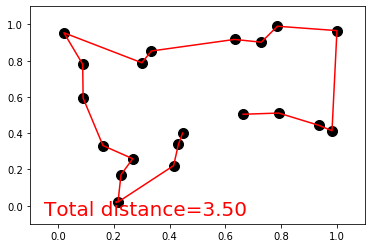

Gen: 107  best fit: 90455.55


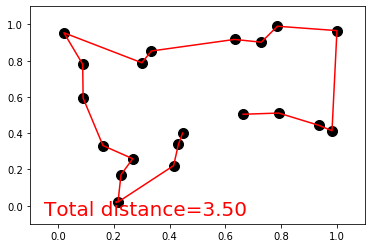

Gen: 108  best fit: 90455.55


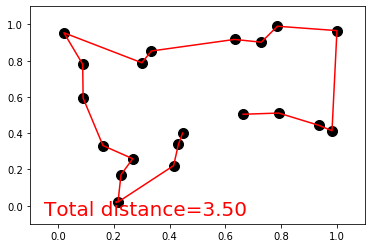

Gen: 109  best fit: 90455.55


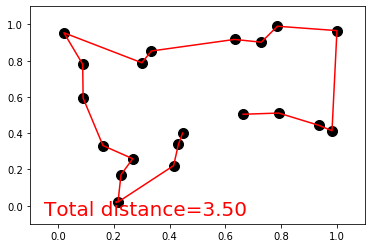

Gen: 110  best fit: 90455.55


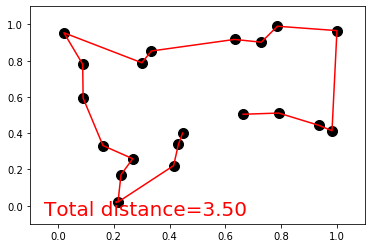

Gen: 111  best fit: 90455.55


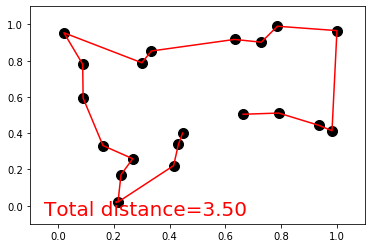

Gen: 112  best fit: 90455.55


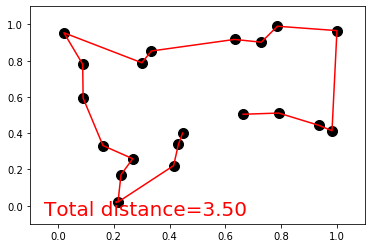

Gen: 113  best fit: 90455.55


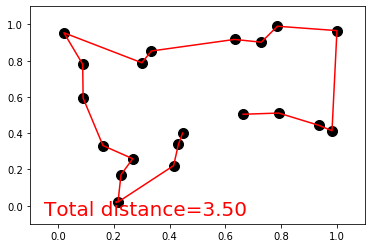

Gen: 114  best fit: 90455.55


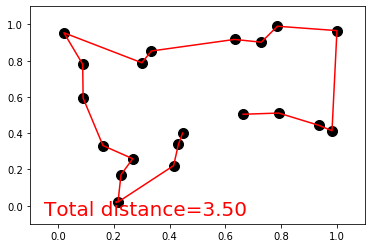

Gen: 115  best fit: 90455.55


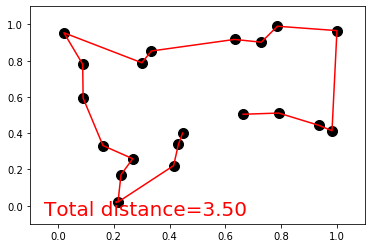

Gen: 116  best fit: 90455.55


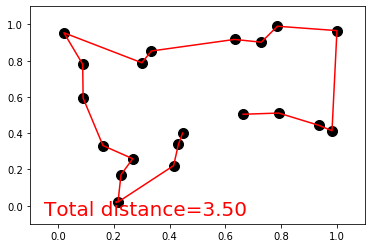

Gen: 117  best fit: 90455.55


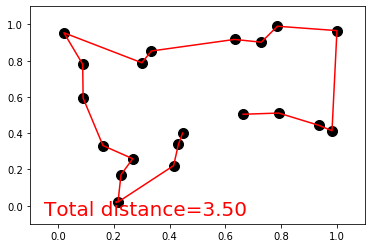

Gen: 118  best fit: 90455.55


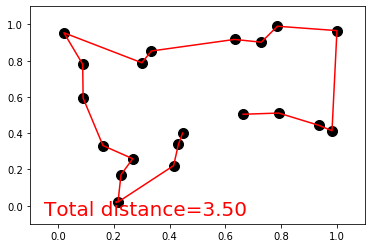

Gen: 119  best fit: 90455.55


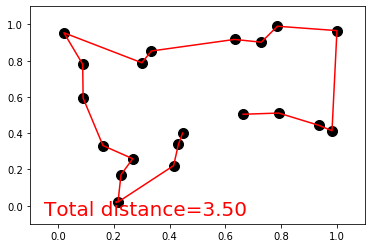

Gen: 120  best fit: 90455.55


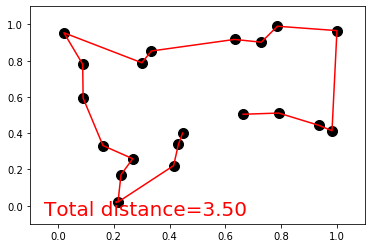

Gen: 121  best fit: 90455.55


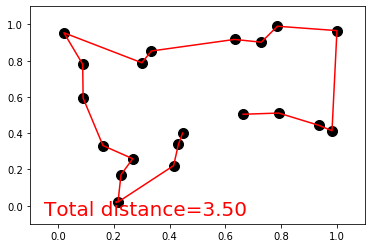

Gen: 122  best fit: 90455.55


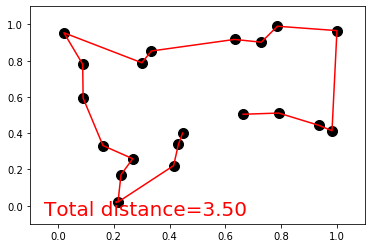

Gen: 123  best fit: 90455.55


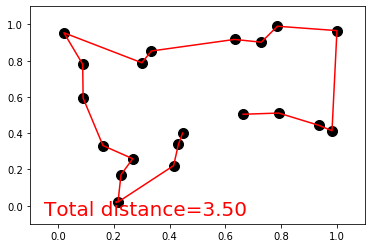

Gen: 124  best fit: 90455.55


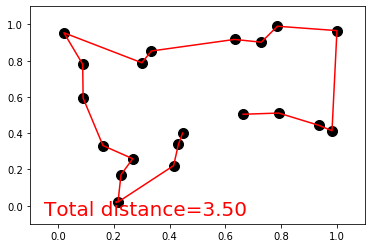

Gen: 125  best fit: 90455.55


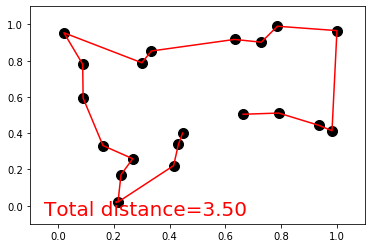

Gen: 126  best fit: 90455.55


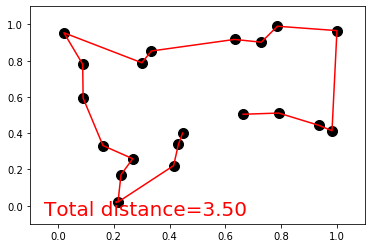

Gen: 127  best fit: 90455.55


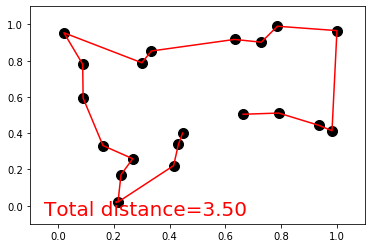

Gen: 128  best fit: 90455.55


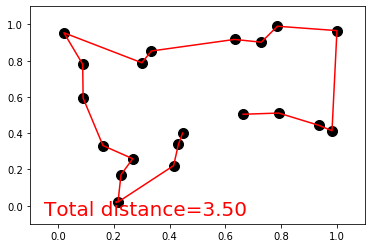

Gen: 129  best fit: 90455.55


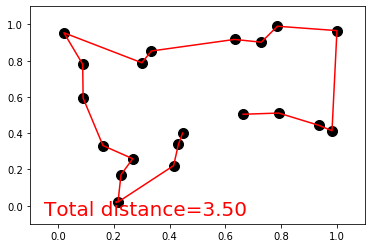

Gen: 130  best fit: 90455.55


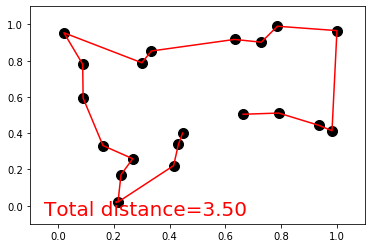

Gen: 131  best fit: 90455.55


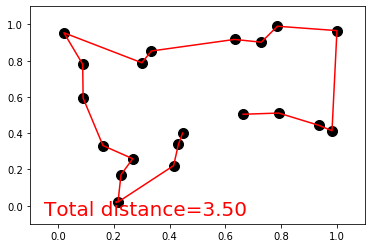

Gen: 132  best fit: 90455.55


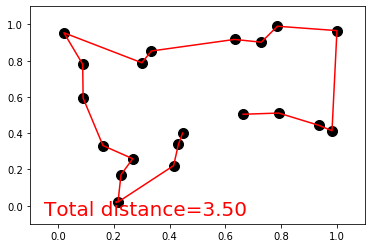

Gen: 133  best fit: 90455.55


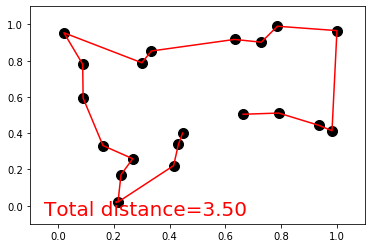

Gen: 134  best fit: 90455.55


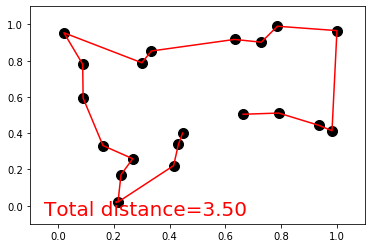

Gen: 135  best fit: 90455.55


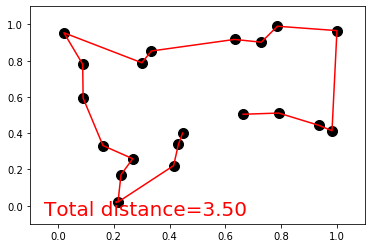

Gen: 136  best fit: 90455.55


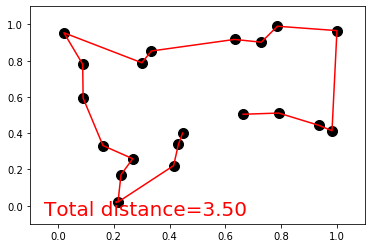

Gen: 137  best fit: 90455.55


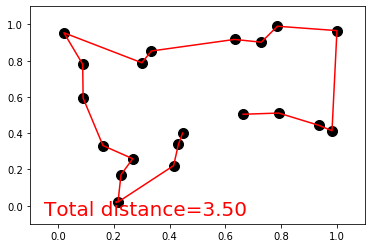

Gen: 138  best fit: 90455.55


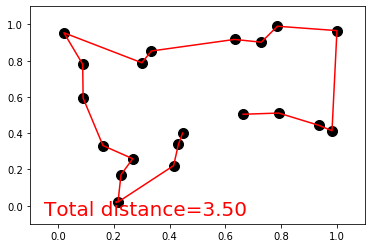

Gen: 139  best fit: 90455.55


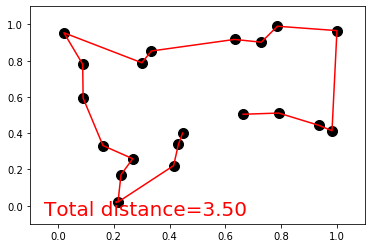

Gen: 140  best fit: 90455.55


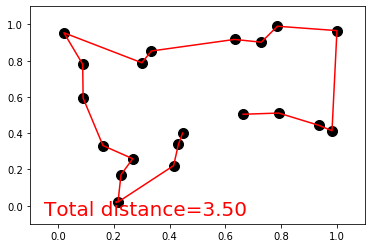

Gen: 141  best fit: 90455.55


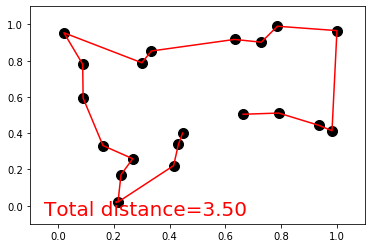

Gen: 142  best fit: 90455.55


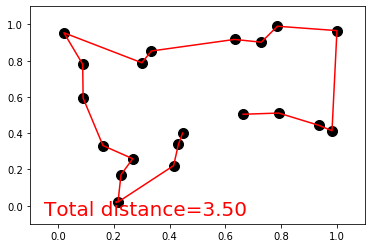

Gen: 143  best fit: 90455.55


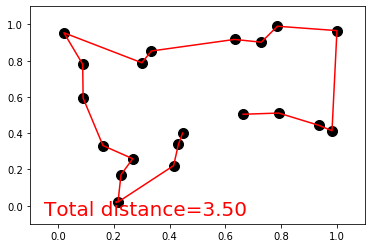

Gen: 144  best fit: 90455.55


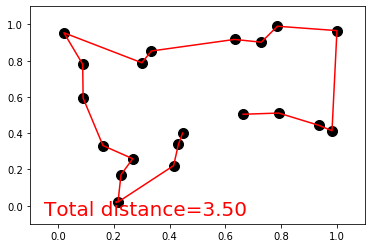

Gen: 145  best fit: 90455.55


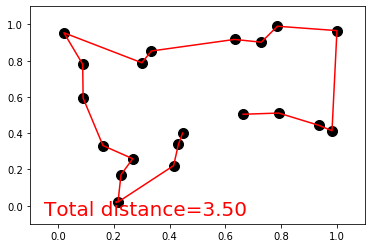

Gen: 146  best fit: 90455.55


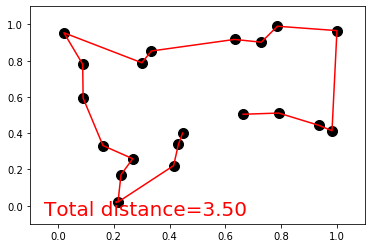

Gen: 147  best fit: 90455.55


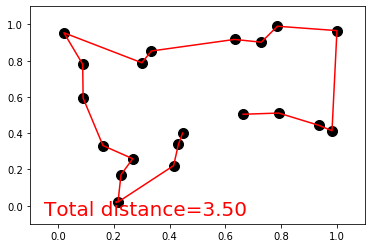

Gen: 148  best fit: 90455.55


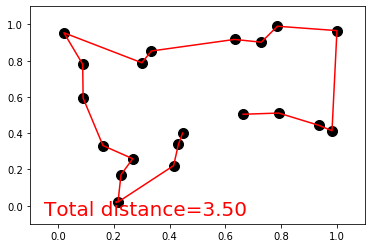

Gen: 149  best fit: 90455.55


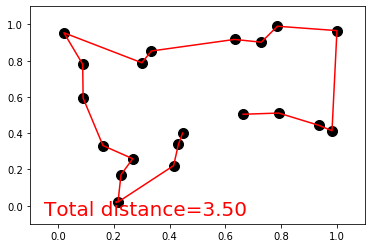

Gen: 150  best fit: 90455.55


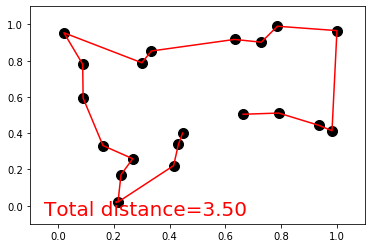

Gen: 151  best fit: 90455.55


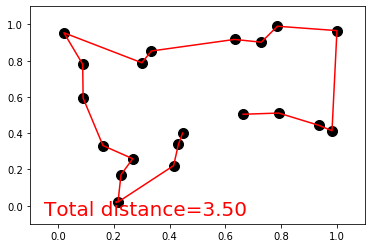

Gen: 152  best fit: 90455.55


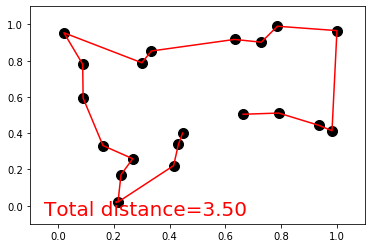

Gen: 153  best fit: 90455.55


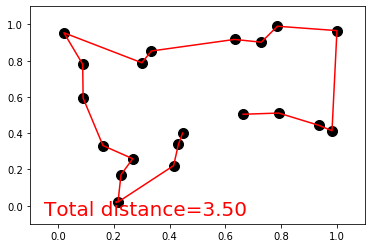

Gen: 154  best fit: 90455.55


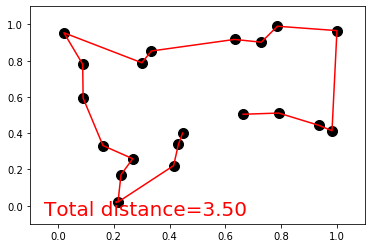

Gen: 155  best fit: 90455.55


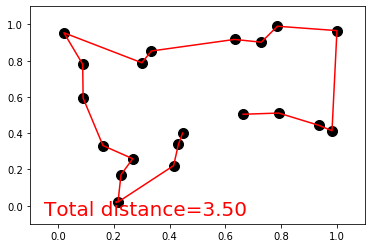

Gen: 156  best fit: 90455.55


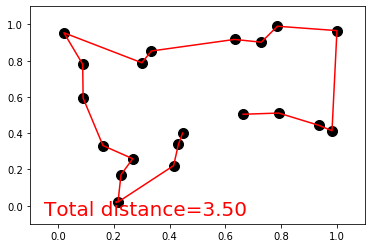

Gen: 157  best fit: 90455.55


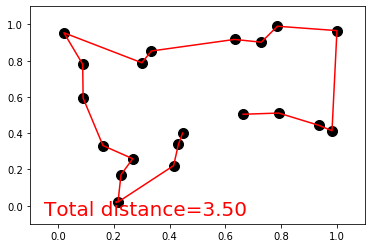

Gen: 158  best fit: 90455.55


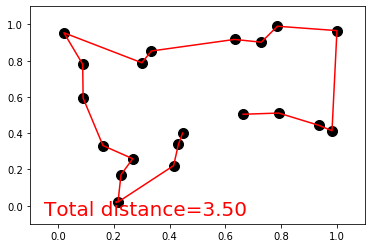

Gen: 159  best fit: 90455.55


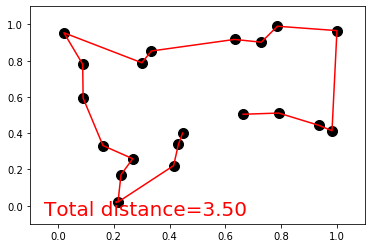

Gen: 160  best fit: 90455.55


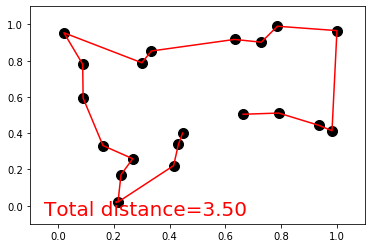

Gen: 161  best fit: 90455.55


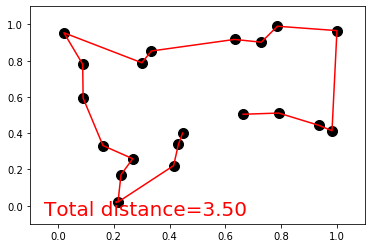

Gen: 162  best fit: 90455.55


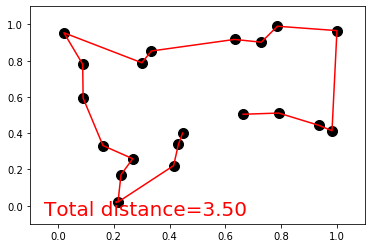

Gen: 163  best fit: 90455.55


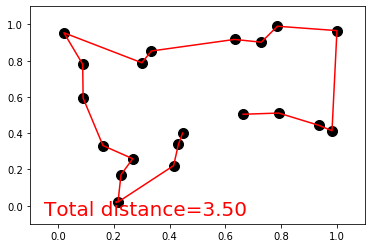

Gen: 164  best fit: 90455.55


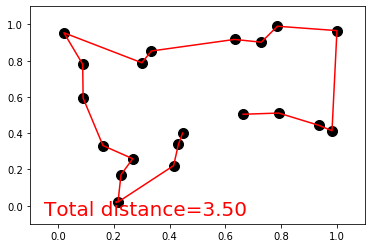

Gen: 165  best fit: 90455.55


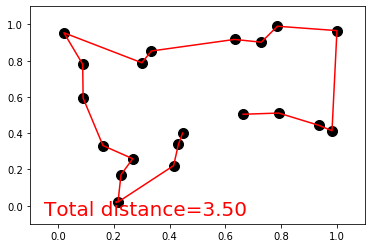

Gen: 166  best fit: 90455.55


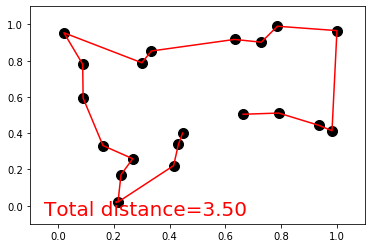

Gen: 167  best fit: 90455.55


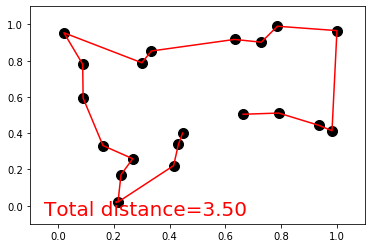

Gen: 168  best fit: 90455.55


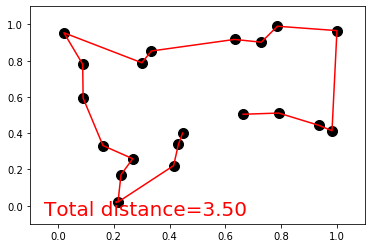

Gen: 169  best fit: 90455.55


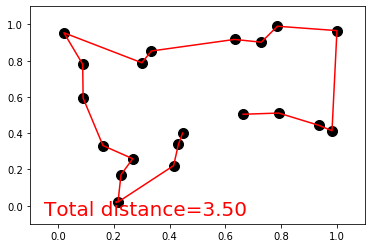

Gen: 170  best fit: 90455.55


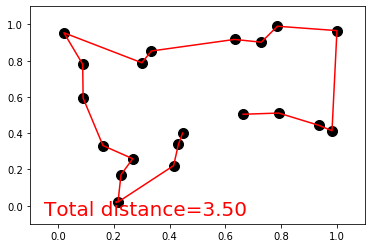

Gen: 171  best fit: 90455.55


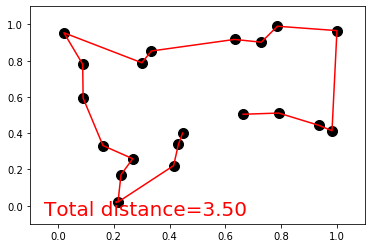

Gen: 172  best fit: 90455.55


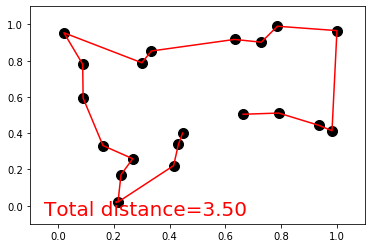

Gen: 173  best fit: 90455.55


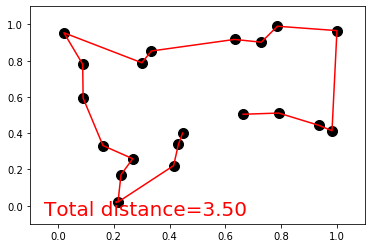

Gen: 174  best fit: 90455.55


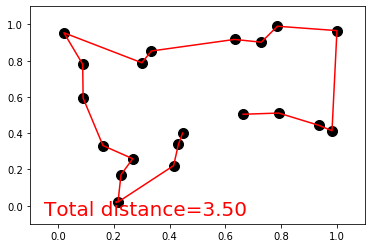

Gen: 175  best fit: 90455.55


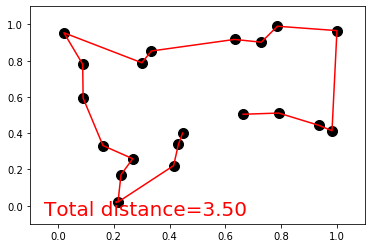

Gen: 176  best fit: 90455.55


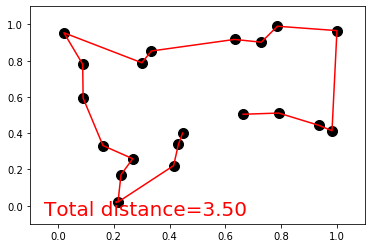

Gen: 177  best fit: 90455.55


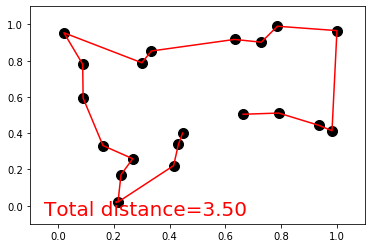

Gen: 178  best fit: 90455.55


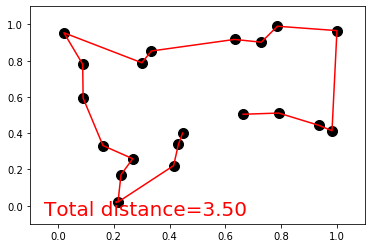

Gen: 179  best fit: 90455.55


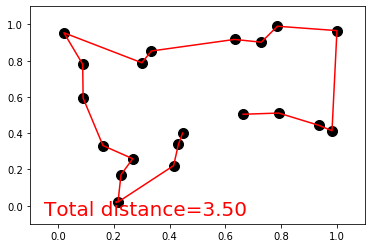

Gen: 180  best fit: 90455.55


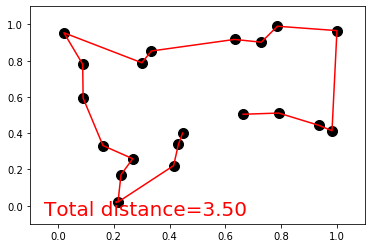

Gen: 181  best fit: 90455.55


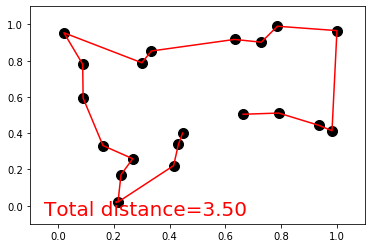

Gen: 182  best fit: 90455.55


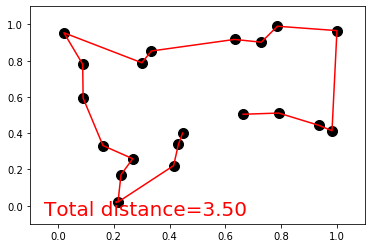

Gen: 183  best fit: 90455.55


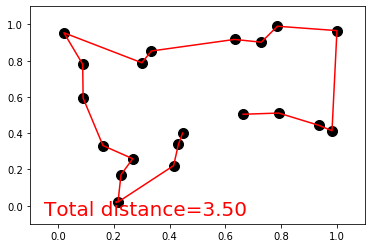

Gen: 184  best fit: 90455.55


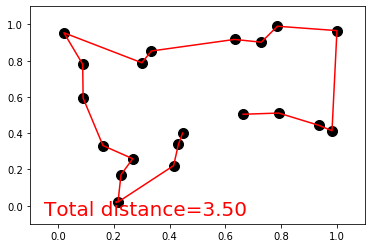

Gen: 185  best fit: 90455.55


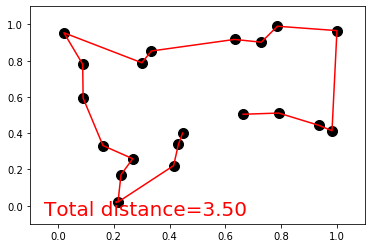

Gen: 186  best fit: 90455.55


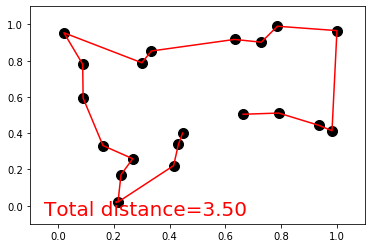

Gen: 187  best fit: 90455.55


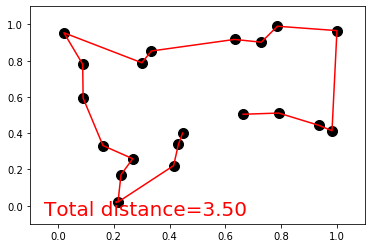

Gen: 188  best fit: 90455.55


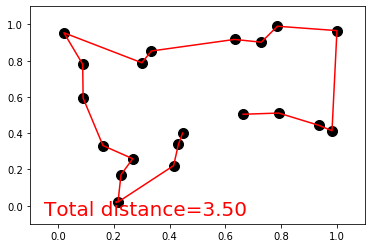

Gen: 189  best fit: 90455.55


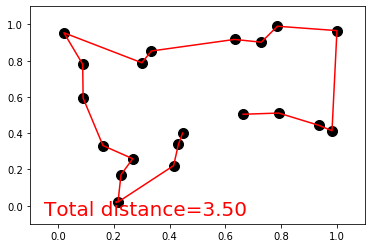

Gen: 190  best fit: 90455.55


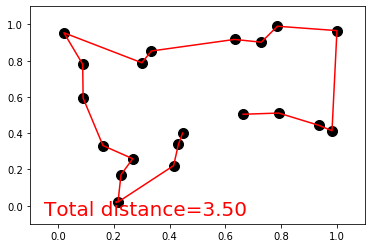

Gen: 191  best fit: 90455.55


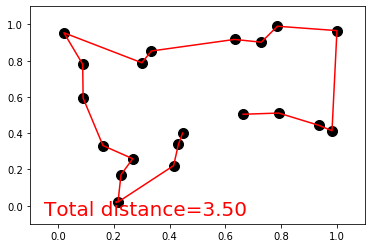

Gen: 192  best fit: 90455.55


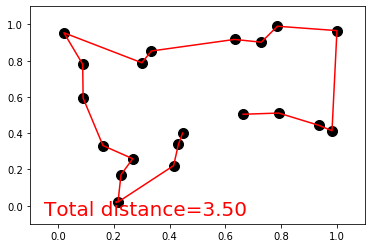

Gen: 193  best fit: 90455.55


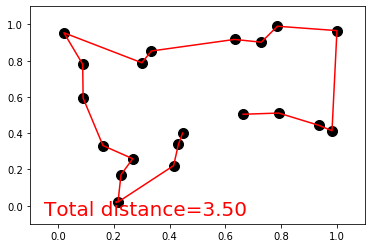

Gen: 194  best fit: 90455.55


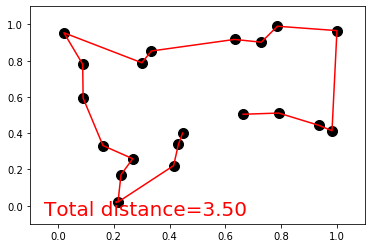

Gen: 195  best fit: 90455.55


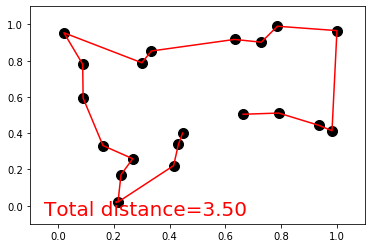

Gen: 196  best fit: 90455.55


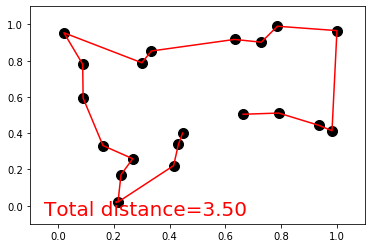

Gen: 197  best fit: 90455.55


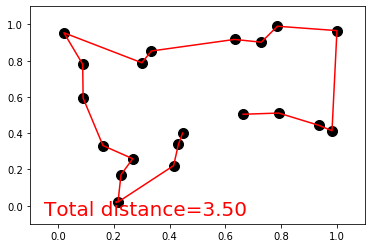

Gen: 198  best fit: 90455.55


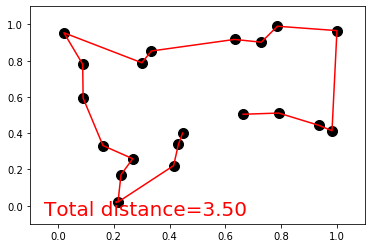

Gen: 199  best fit: 90455.55


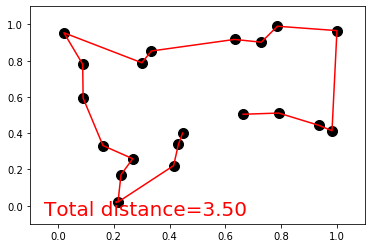

Gen: 200  best fit: 90455.55


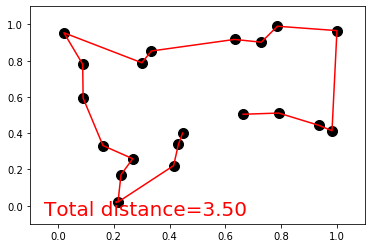

Gen: 201  best fit: 90455.55


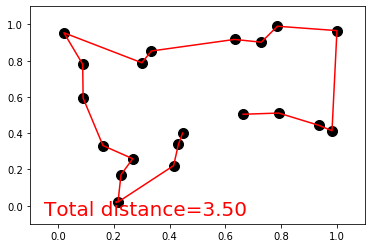

Gen: 202  best fit: 90455.55


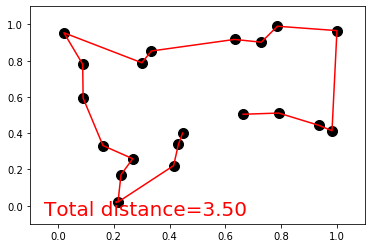

Gen: 203  best fit: 90455.55


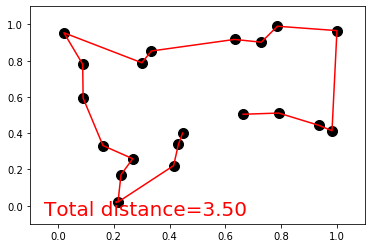

Gen: 204  best fit: 90455.55


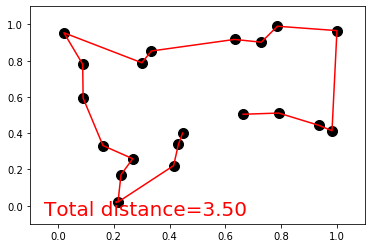

Gen: 205  best fit: 90455.55


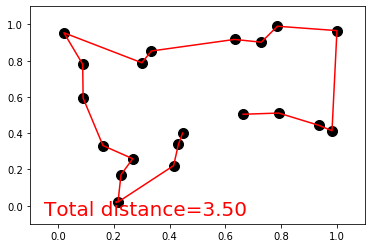

Gen: 206  best fit: 90455.55


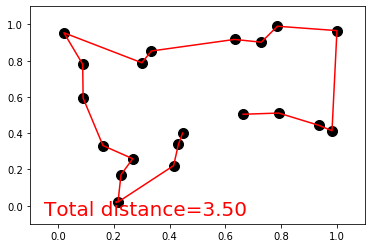

Gen: 207  best fit: 90455.55


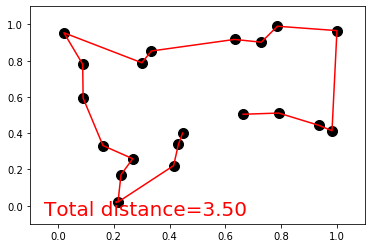

Gen: 208  best fit: 90455.55


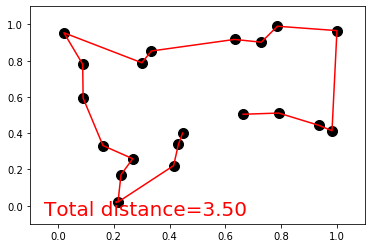

Gen: 209  best fit: 90455.55


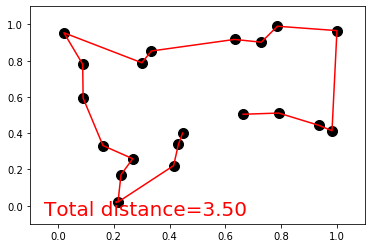

Gen: 210  best fit: 90455.55


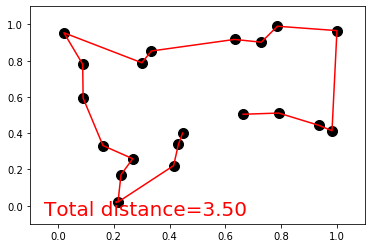

Gen: 211  best fit: 90455.55


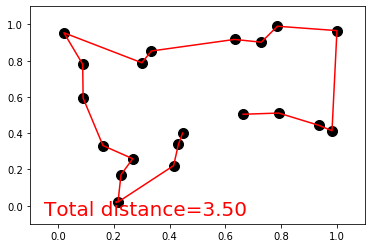

Gen: 212  best fit: 90455.55


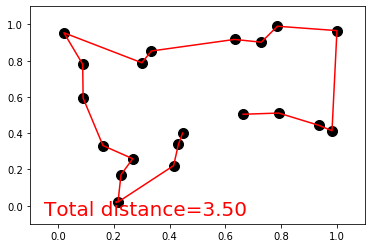

Gen: 213  best fit: 90455.55


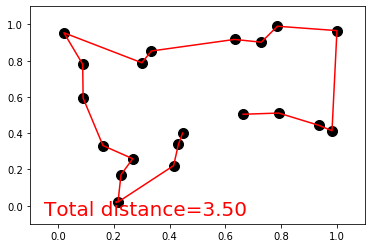

Gen: 214  best fit: 90455.55


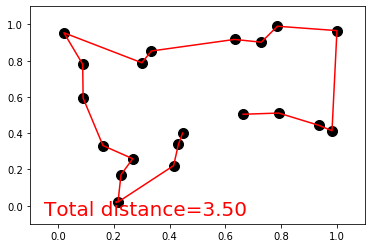

Gen: 215  best fit: 90455.55


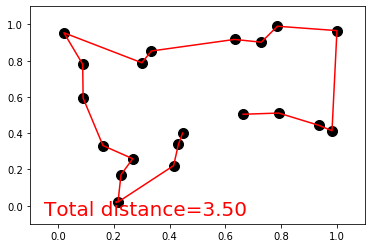

Gen: 216  best fit: 90455.55


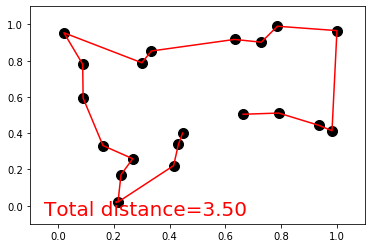

Gen: 217  best fit: 90455.55


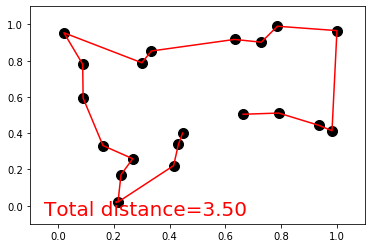

Gen: 218  best fit: 90455.55


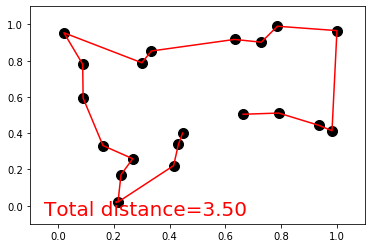

Gen: 219  best fit: 90455.55


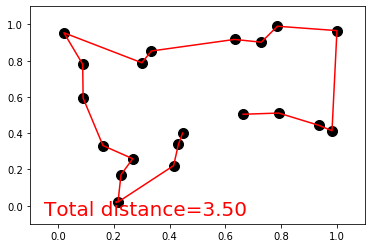

Gen: 220  best fit: 90455.55


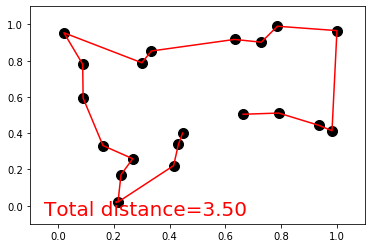

Gen: 221  best fit: 90455.55


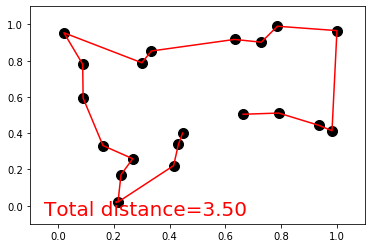

Gen: 222  best fit: 90455.55


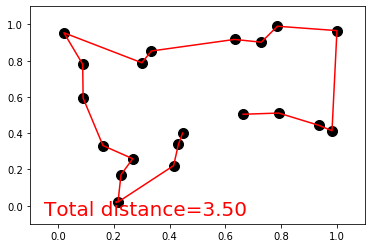

Gen: 223  best fit: 90455.55


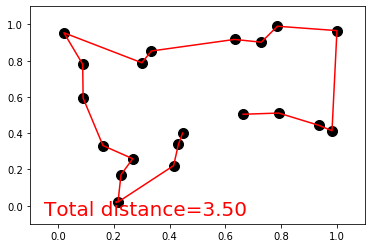

Gen: 224  best fit: 90455.55


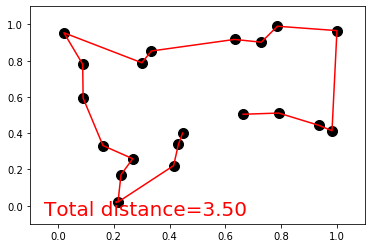

Gen: 225  best fit: 90455.55


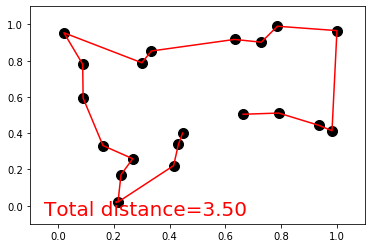

Gen: 226  best fit: 90455.55


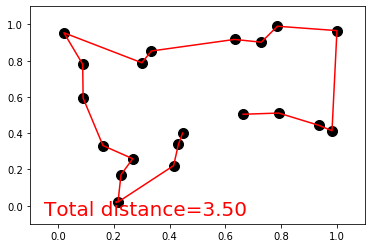

Gen: 227  best fit: 90455.55


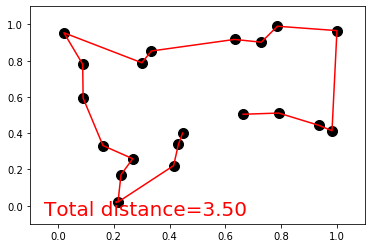

Gen: 228  best fit: 90455.55


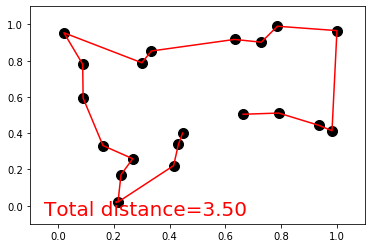

Gen: 229  best fit: 90455.55


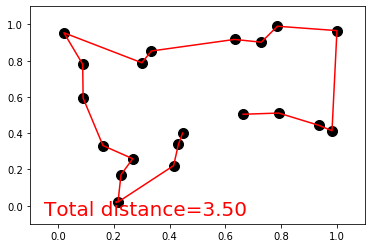

Gen: 230  best fit: 90455.55


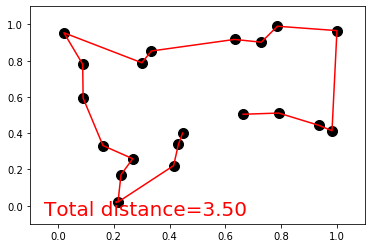

Gen: 231  best fit: 90455.55


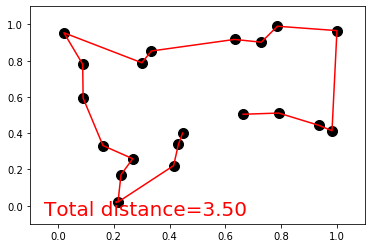

Gen: 232  best fit: 90455.55


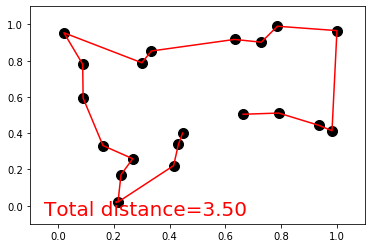

Gen: 233  best fit: 90455.55


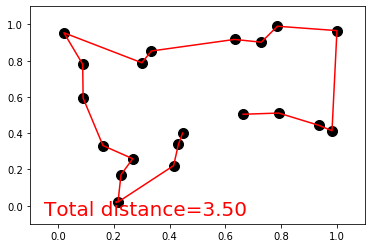

Gen: 234  best fit: 90455.55


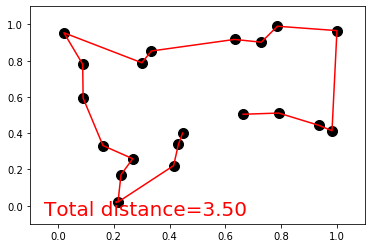

Gen: 235  best fit: 90455.55


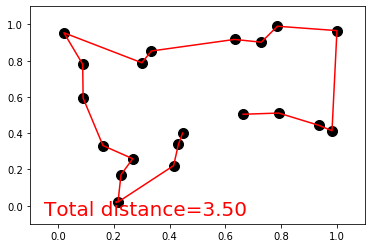

Gen: 236  best fit: 90455.55


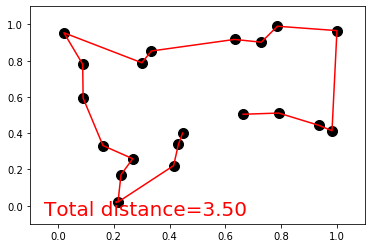

Gen: 237  best fit: 90455.55


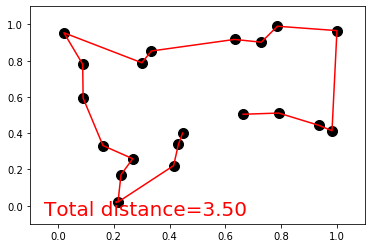

Gen: 238  best fit: 90455.55


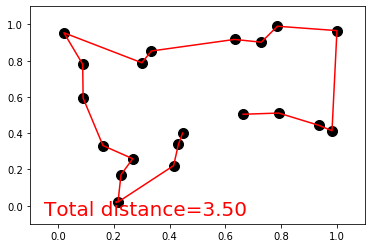

Gen: 239  best fit: 90455.55


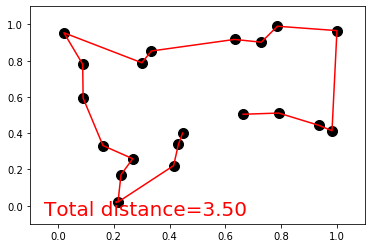

Gen: 240  best fit: 90455.55


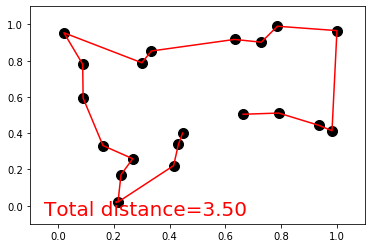

Gen: 241  best fit: 90455.55


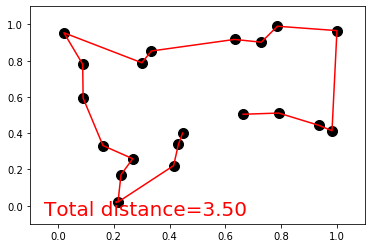

Gen: 242  best fit: 90455.55


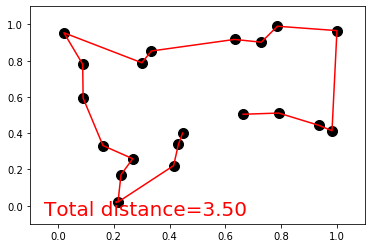

Gen: 243  best fit: 90455.55


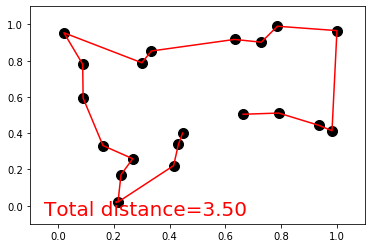

Gen: 244  best fit: 90455.55


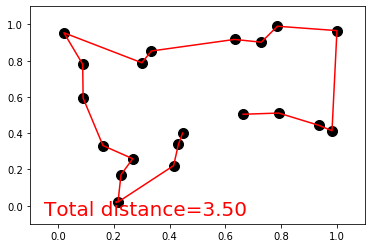

Gen: 245  best fit: 90455.55


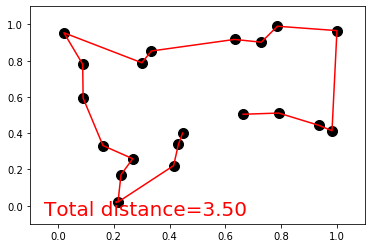

Gen: 246  best fit: 90455.55


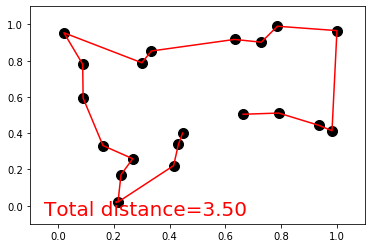

Gen: 247  best fit: 90455.55


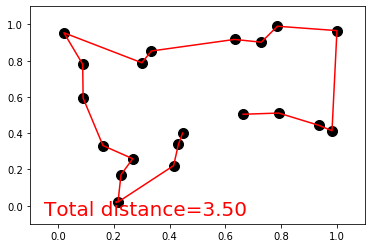

Gen: 248  best fit: 90455.55


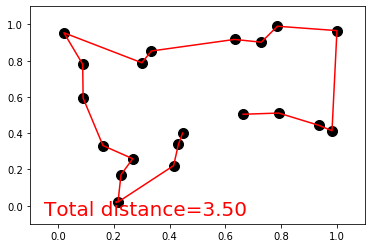

Gen: 249  best fit: 90455.55


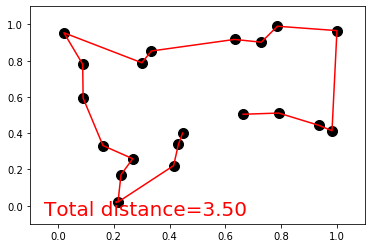

Gen: 250  best fit: 90455.55


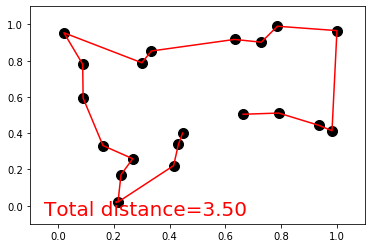

Gen: 251  best fit: 90455.55


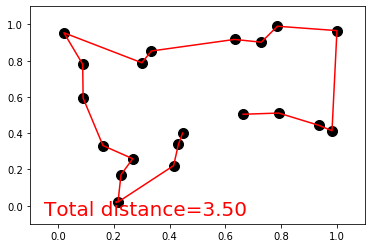

Gen: 252  best fit: 90455.55


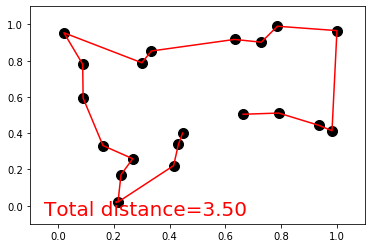

Gen: 253  best fit: 90455.55


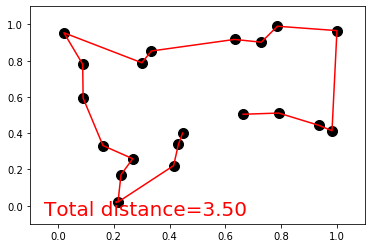

Gen: 254  best fit: 90455.55


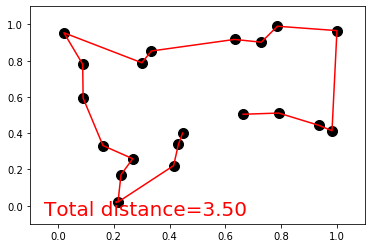

Gen: 255  best fit: 90455.55


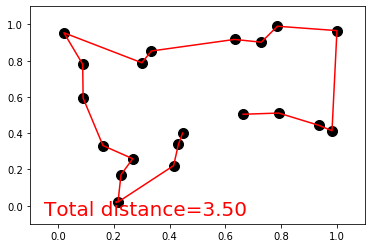

Gen: 256  best fit: 90455.55


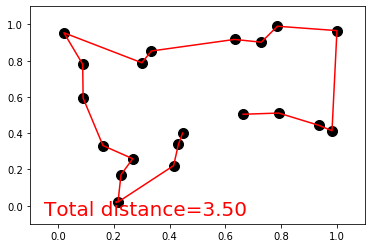

Gen: 257  best fit: 90455.55


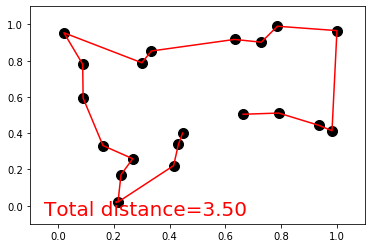

Gen: 258  best fit: 90455.55


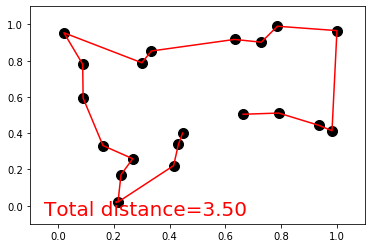

Gen: 259  best fit: 90455.55


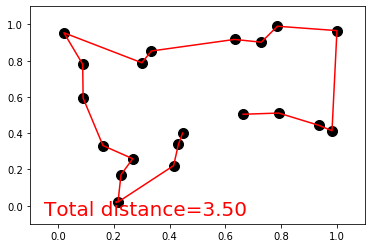

Gen: 260  best fit: 90455.55


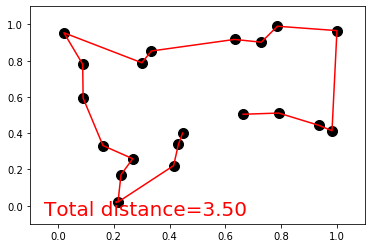

Gen: 261  best fit: 90455.55


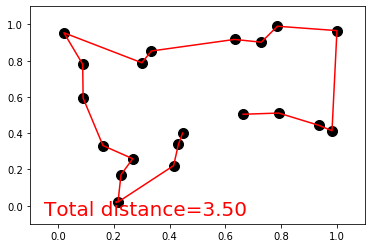

Gen: 262  best fit: 90455.55


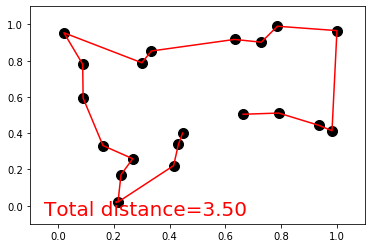

Gen: 263  best fit: 90455.55


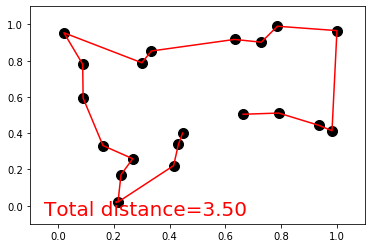

Gen: 264  best fit: 90455.55


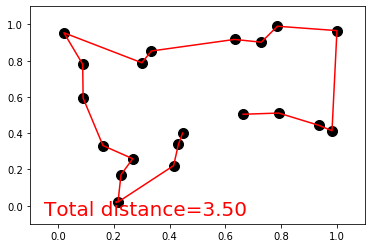

Gen: 265  best fit: 90455.55


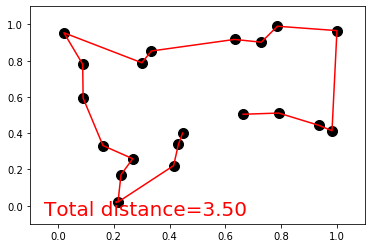

Gen: 266  best fit: 90455.55


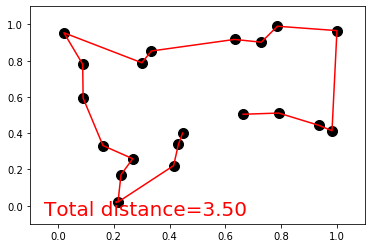

Gen: 267  best fit: 90455.55


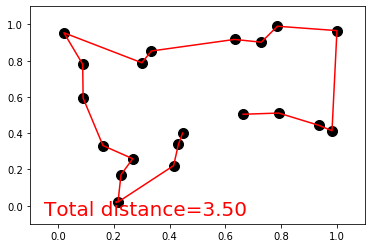

Gen: 268  best fit: 90455.55


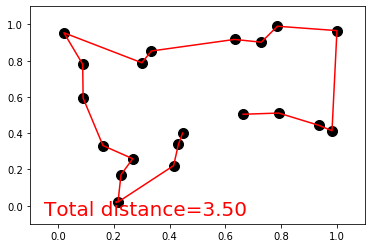

Gen: 269  best fit: 90455.55


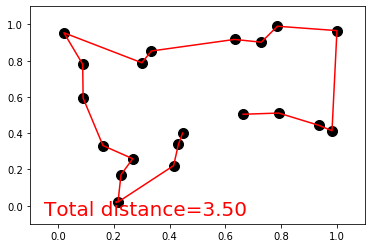

Gen: 270  best fit: 90455.55


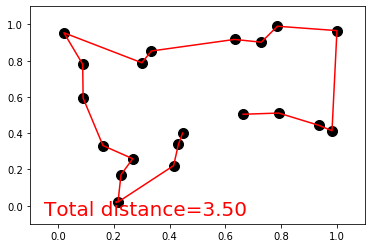

Gen: 271  best fit: 90455.55


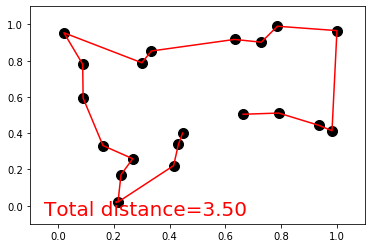

Gen: 272  best fit: 90455.55


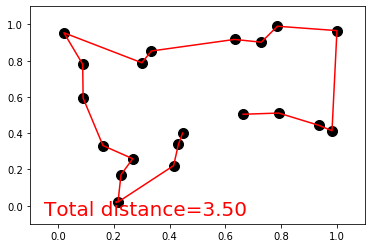

Gen: 273  best fit: 90455.55


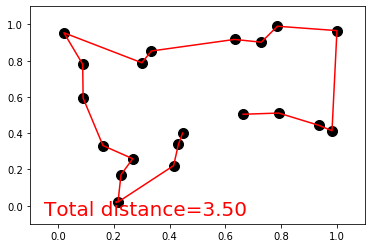

Gen: 274  best fit: 90455.55


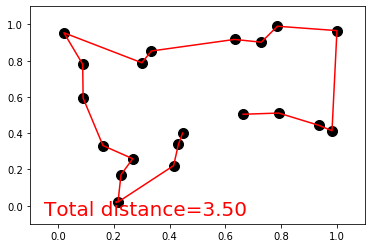

Gen: 275  best fit: 90455.55


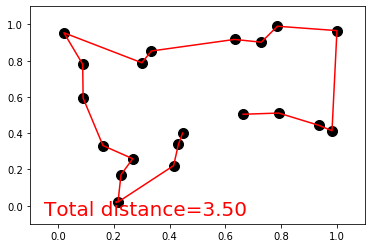

Gen: 276  best fit: 90455.55


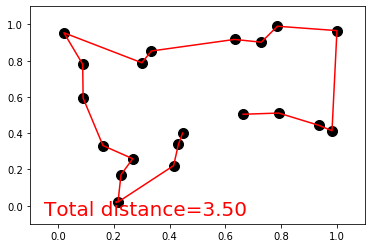

Gen: 277  best fit: 90455.55


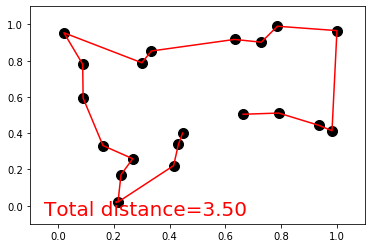

Gen: 278  best fit: 90455.55


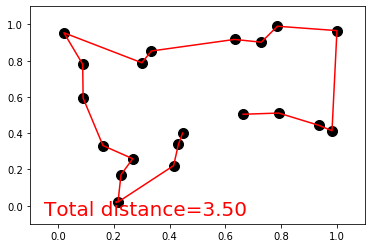

Gen: 279  best fit: 90455.55


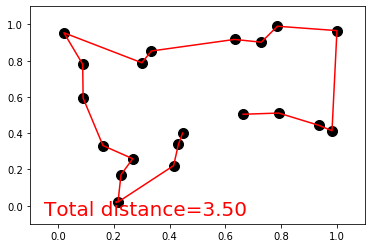

Gen: 280  best fit: 90455.55


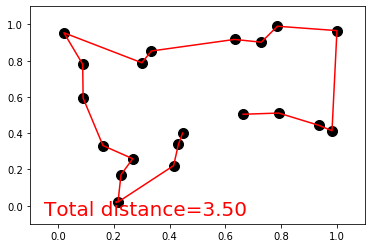

Gen: 281  best fit: 90455.55


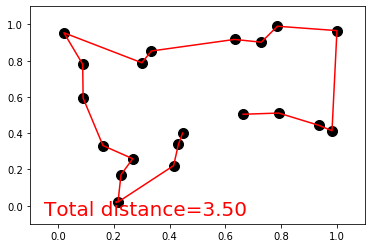

Gen: 282  best fit: 90455.55


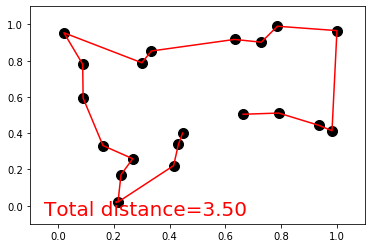

Gen: 283  best fit: 90455.55


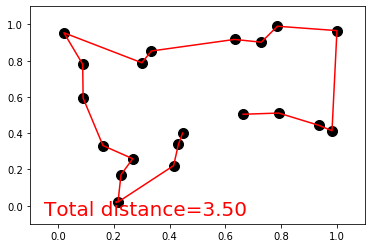

Gen: 284  best fit: 90455.55


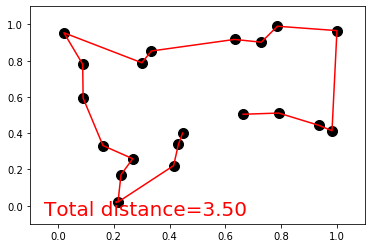

Gen: 285  best fit: 90455.55


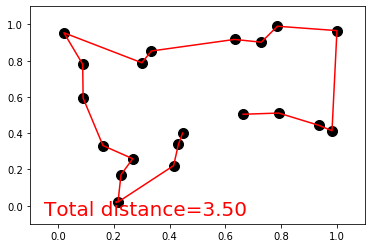

Gen: 286  best fit: 90455.55


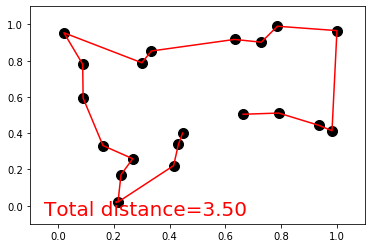

Gen: 287  best fit: 90455.55


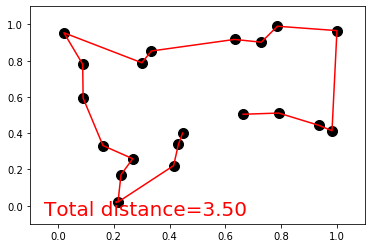

Gen: 288  best fit: 90455.55


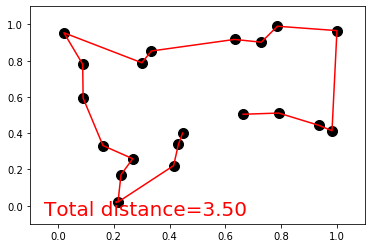

Gen: 289  best fit: 90455.55


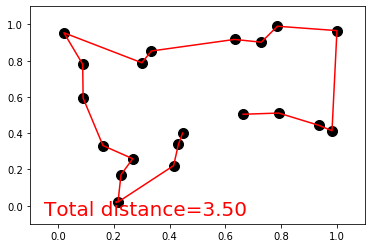

Gen: 290  best fit: 90455.55


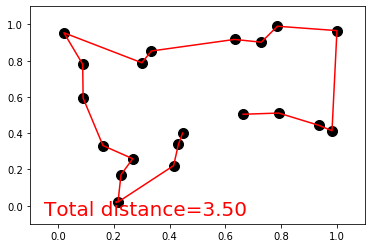

Gen: 291  best fit: 90455.55


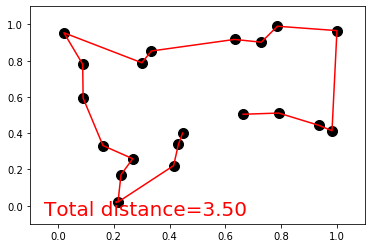

Gen: 292  best fit: 90455.55


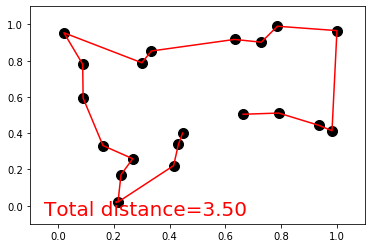

Gen: 293  best fit: 90455.55


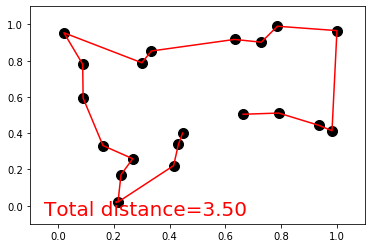

Gen: 294  best fit: 90455.55


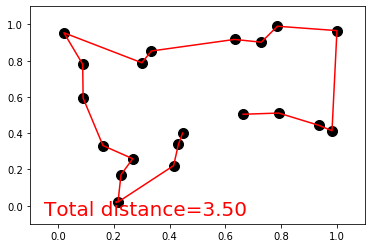

Gen: 295  best fit: 90455.55


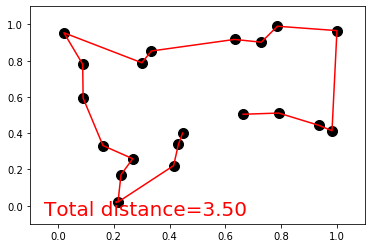

Gen: 296  best fit: 90455.55


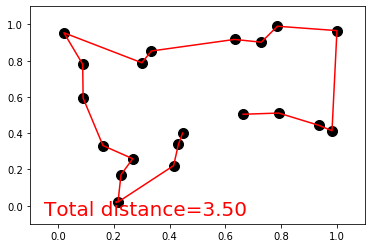

Gen: 297  best fit: 90455.55


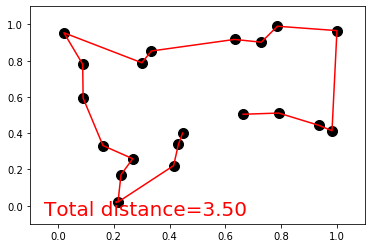

Gen: 298  best fit: 90455.55


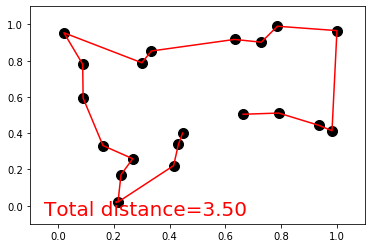

Gen: 299  best fit: 90455.55


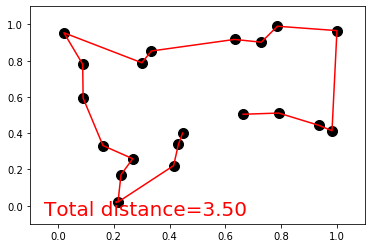

Gen: 300  best fit: 90455.55


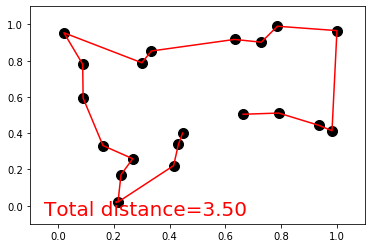

Gen: 301  best fit: 90455.55


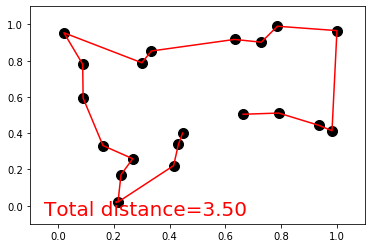

Gen: 302  best fit: 90455.55


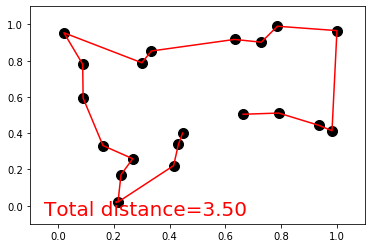

Gen: 303  best fit: 90455.55


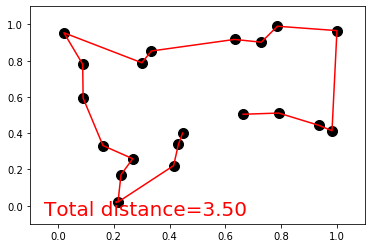

Gen: 304  best fit: 90455.55


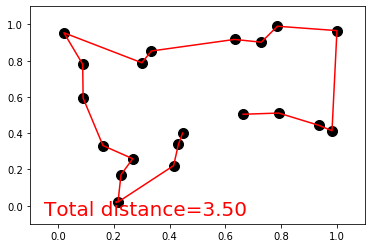

Gen: 305  best fit: 90455.55


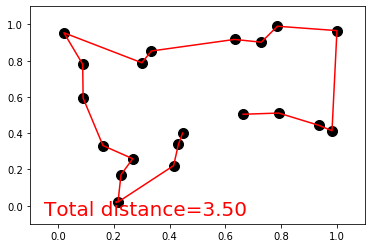

Gen: 306  best fit: 90455.55


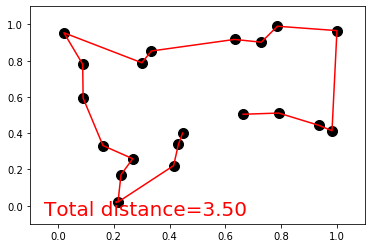

Gen: 307  best fit: 90455.55


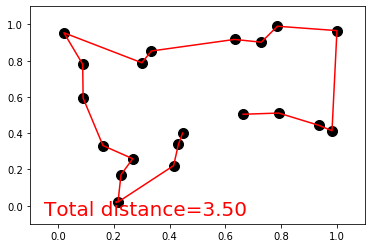

Gen: 308  best fit: 90455.55


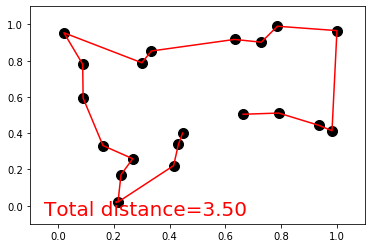

Gen: 309  best fit: 90455.55


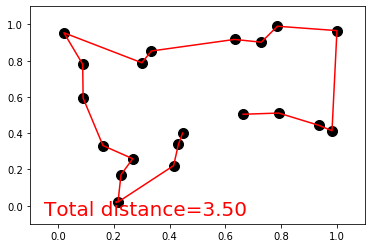

Gen: 310  best fit: 90455.55


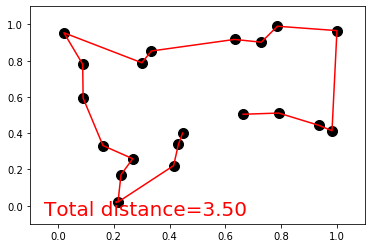

Gen: 311  best fit: 90455.55


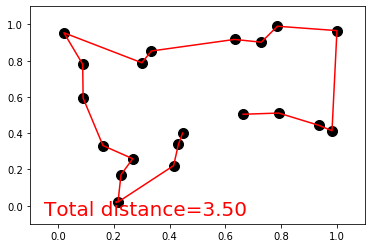

Gen: 312  best fit: 90455.55


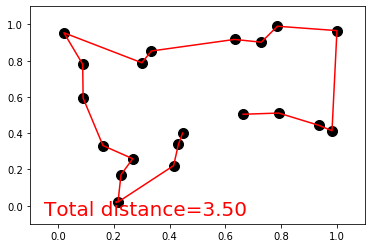

Gen: 313  best fit: 90455.55


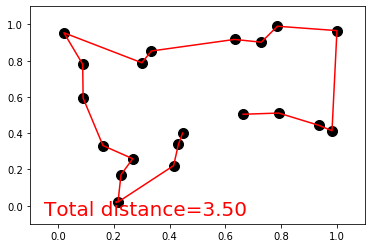

Gen: 314  best fit: 90455.55


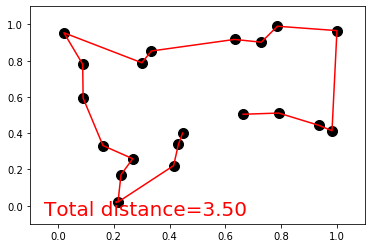

Gen: 315  best fit: 90455.55


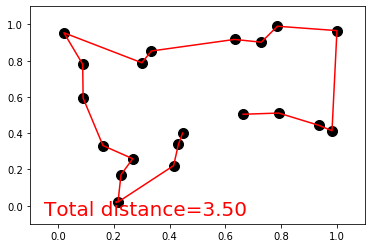

Gen: 316  best fit: 90455.55


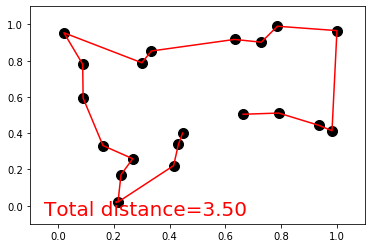

Gen: 317  best fit: 90455.55


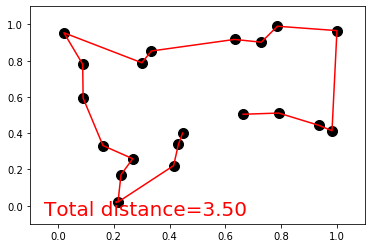

Gen: 318  best fit: 90455.55


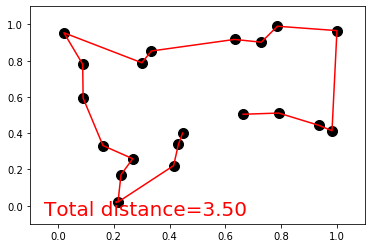

Gen: 319  best fit: 90455.55


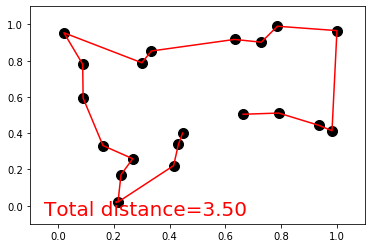

Gen: 320  best fit: 90455.55


KeyboardInterrupt: 

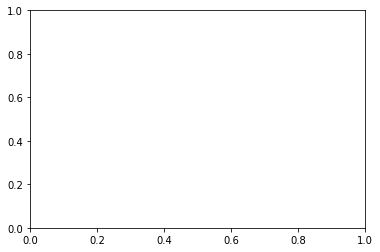

In [5]:
ga = GA(DNA_size=N_CITIES, cross_rate=CROSS_RATE,
       mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)

env = TravelSalesPerson(N_CITIES)
for generation in range(N_GENERATIONS):
    lx, ly = ga.translateDNA(ga.pop, env.city_position)
    fitness, total_distance = ga.get_fitness(lx, ly)
    ga.evolve(fitness)
    best_idx = np.argmax(fitness)
    print('Gen:', generation, 
          ' best fit: %.2f' % fitness[best_idx],)
    
    env.plotting(lx[best_idx], ly[best_idx], 
                 total_distance[best_idx])

plt.ioff()
plt.show()